In [2834]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neural_network import MLPClassifier


In [2835]:
import pandas as pd
df = pd.read_csv("kidney_disease.csv")
df['classification'] = df['classification'].str.strip()

In [2836]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2837]:
df.shape

(400, 26)

In [2838]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [2839]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
categorical_col = df.select_dtypes(include=['object']).columns

In [2840]:
print(numerical_col)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')


In [2841]:
print(categorical_col)

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [2842]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [2843]:
df[numerical_col] = df[numerical_col].apply(lambda x: x.fillna(x.mean()))
df[categorical_col] = df[categorical_col].apply(lambda x: x.fillna(x.mode()[0]))

In [2844]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [2845]:
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [2846]:
df.drop('id', axis=1, inplace=True)

In [2847]:
X = df.drop('classification', axis=1)
y = df['classification']

In [2848]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = X.select_dtypes(include=['object']).columns
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [2849]:
X = df.drop('classification', axis=1)
y = df['classification']

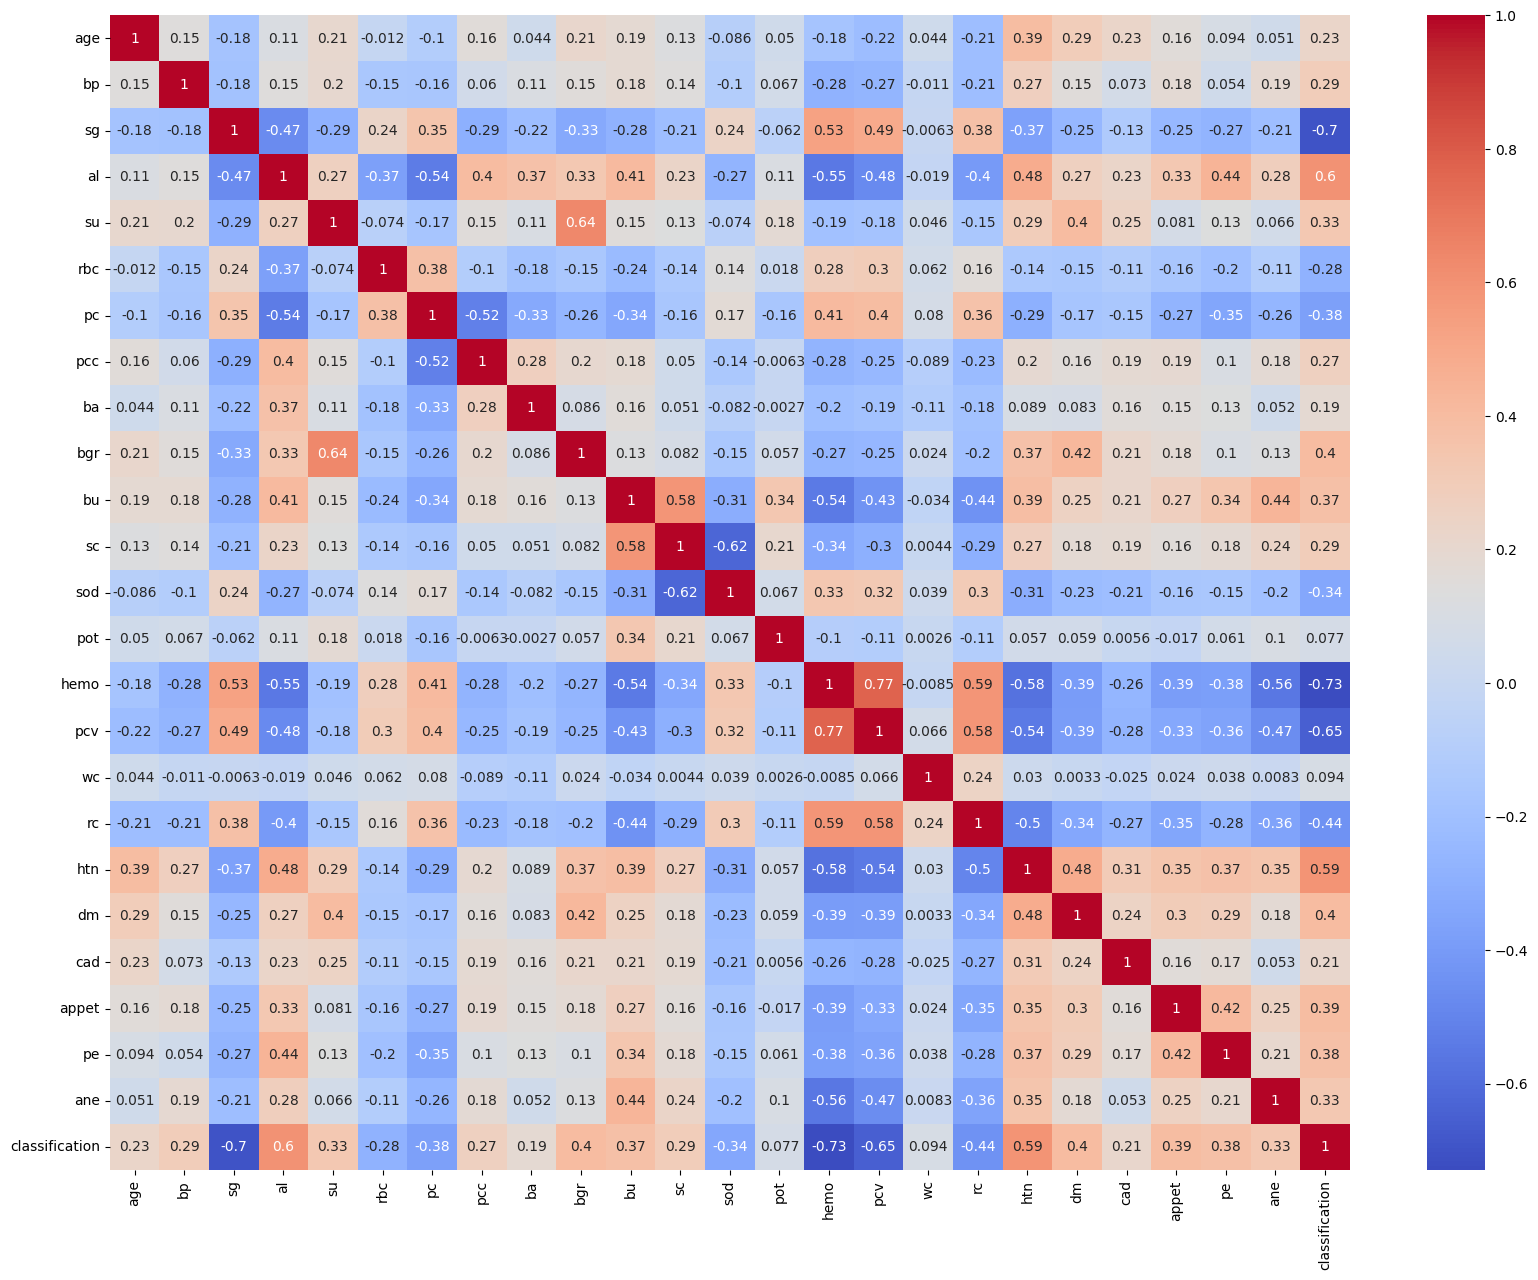

In [2850]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_mat = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

C:\Users\krsam\AppData\Local\Temp\ipykernel_23316\3405337578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['classification'], palette='viridis')


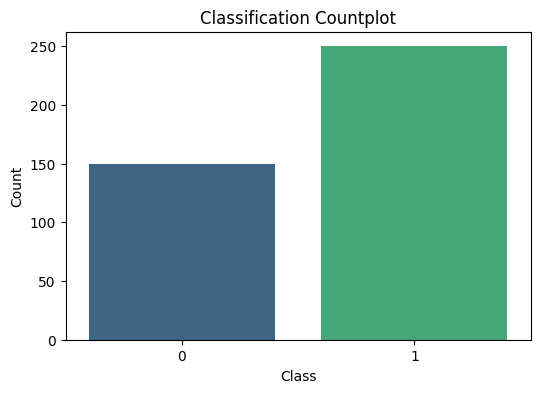

In [2851]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['classification'], palette='viridis')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Classification Countplot")
plt.show()

Correlation Based Feature Selection

In [2852]:
# threshold = 0.5
# corr_feature = set()
# for i in range(len(corr_mat.columns)):
#     for j in range(i):
#         if abs(corr_mat.iloc[i, j]) > threshold:
#             colname = corr_mat.columns[i]
#             corr_feature.add(colname)

# df_feature1 = df.drop(columns = corr_feature)
# print(df_feature1.columns)

In [2853]:
cor_with_target = df.corr()['classification'].drop('classification')

selected_features = cor_with_target[cor_with_target.abs() > 0.4].index

df_feature1 = df[selected_features.tolist()]
print(df_feature1.columns)

Index(['sg', 'al', 'bgr', 'hemo', 'pcv', 'rc', 'htn', 'dm'], dtype='object')


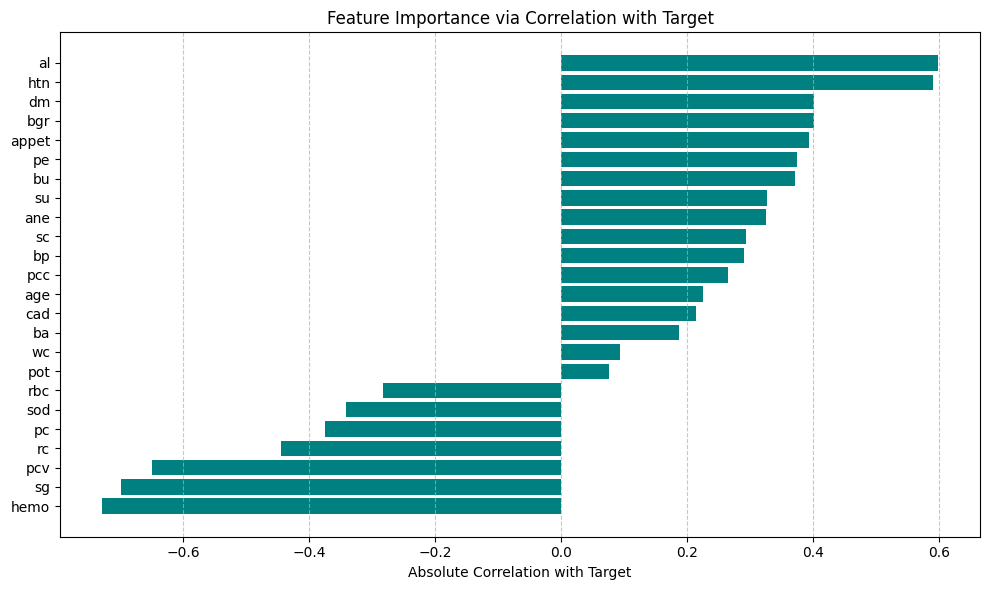

In [2854]:

importance_df = cor_with_target.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df.values, color='teal')
plt.xlabel('Absolute Correlation with Target')
plt.title('Feature Importance via Correlation with Target')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [2855]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df_feature1, y, test_size=0.2, random_state = 42)

In [2856]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Model Training

ANN

In [2857]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2858]:
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2859]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4112 - loss: 0.7476 - val_accuracy: 0.6000 - val_loss: 0.6454
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6026 - loss: 0.6572 - val_accuracy: 0.8250 - val_loss: 0.5512
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7074 - loss: 0.5715 - val_accuracy: 0.8875 - val_loss: 0.4738
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8170 - loss: 0.4972 - val_accuracy: 0.9000 - val_loss: 0.4075
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8680 - loss: 0.4121 - val_accuracy: 0.9250 - val_loss: 0.3500
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9146 - loss: 0.3843 - val_accuracy: 0.9500 - val_loss: 0.2987
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9241 - loss: 0.3178 - val_accuracy: 0.9500 - val_loss: 0.2544
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9035 - loss: 0.3057 - val_accuracy: 0.9500 - val_lo

In [2860]:
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [2861]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [2862]:
print(accuracy_score(y_test, y_pred))

0.9875


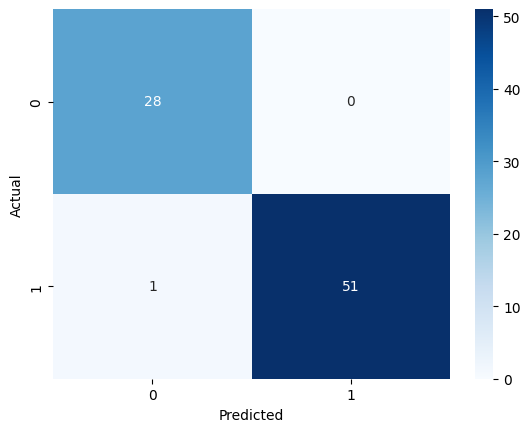

In [2863]:
from sklearn.metrics import confusion_matrix


cf_ann1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_ann1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

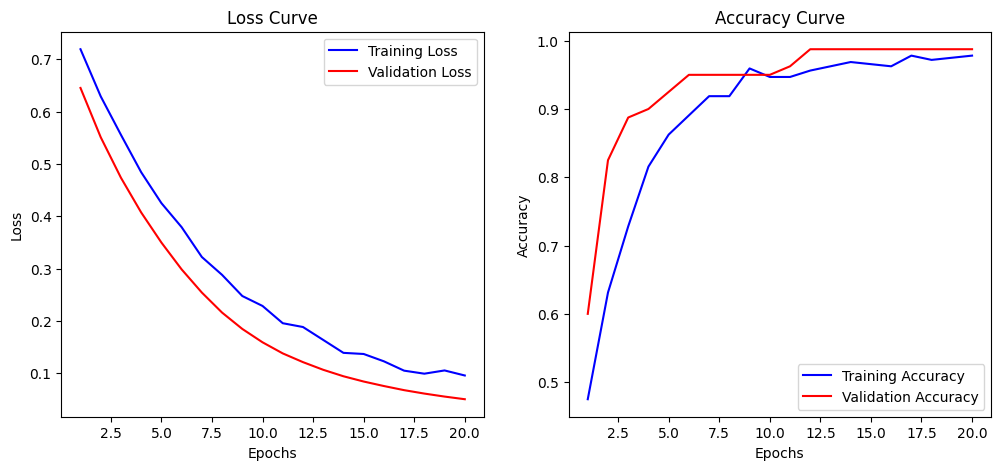

In [2864]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

Decision Tree Classifier

In [2865]:
from sklearn.tree import DecisionTreeClassifier
tr_model = DecisionTreeClassifier(random_state=42)
tr_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [2866]:
y_pred = tr_model.predict(X_test)

In [2867]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



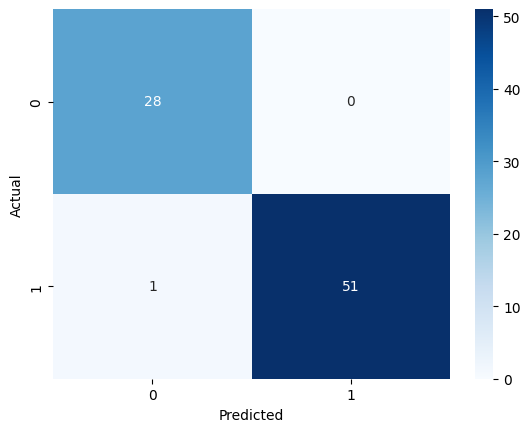

In [2868]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN Classifier

In [2869]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [2870]:
y_predknn = knn.predict(X_test)

In [2871]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



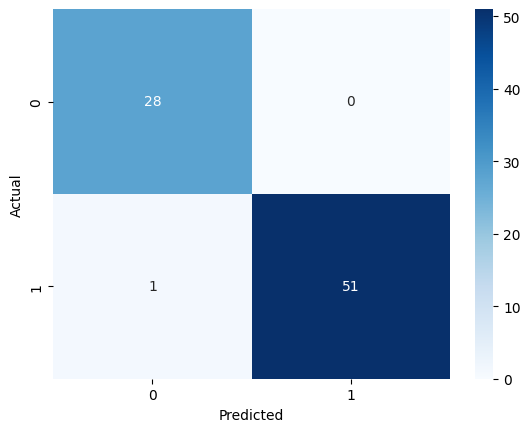

In [2872]:
cf = confusion_matrix(y_test, y_predknn)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [2873]:
k_values = range(1, 21)
k_accuracies = []
for k in k_values:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_accuracies.append(accuracy)


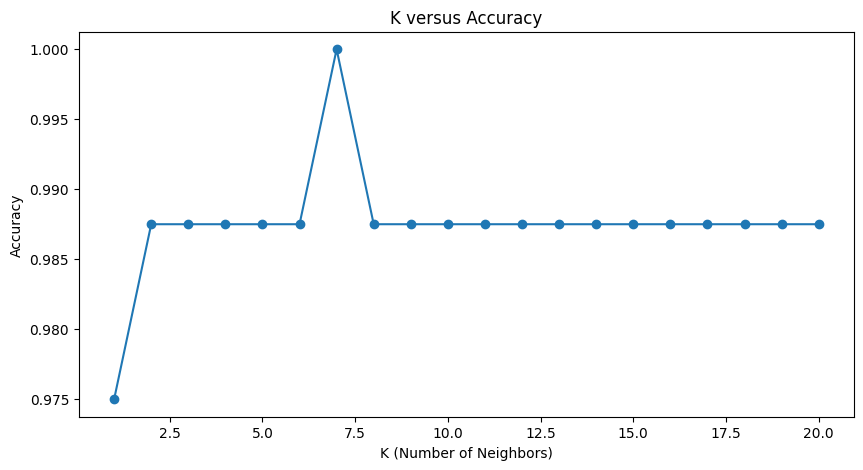

In [2874]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, k_accuracies, marker='o')
plt.title('K versus Accuracy')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

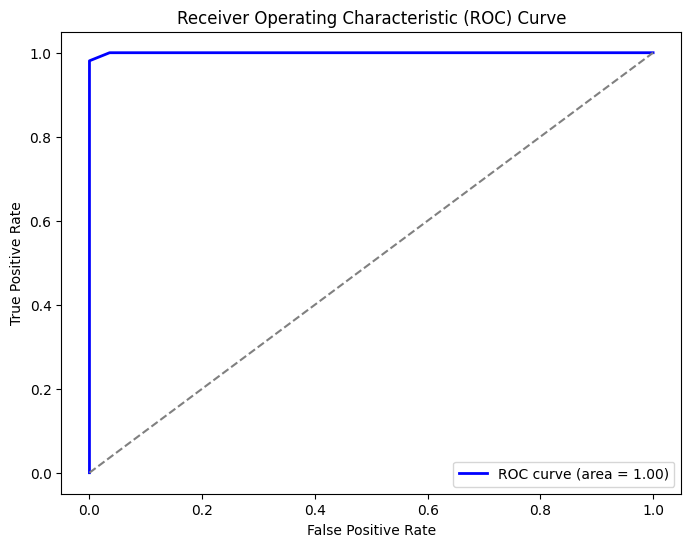

In [2875]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM

In [2876]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2877]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    svm = SVC(kernel = kernel, gamma='scale', C=1)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel : {accuracy:.4f}")

Accuracy with linear kernel : 0.9750
Accuracy with poly kernel : 0.9750
Accuracy with rbf kernel : 1.0000
Accuracy with sigmoid kernel : 0.9875


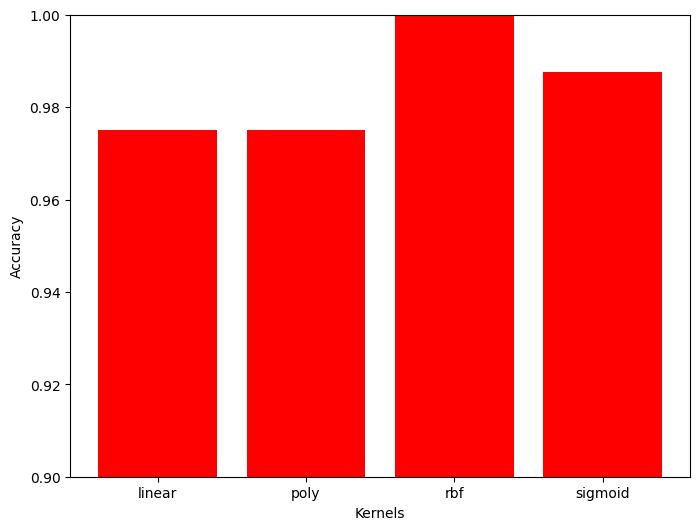

In [2878]:
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color='red')
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

In [2879]:
svm_model = SVC(kernel='rbf',C=1.0,  gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [2880]:
y_predsvm = svm_model.predict(X_test)

In [2881]:
print(classification_report(y_predsvm, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



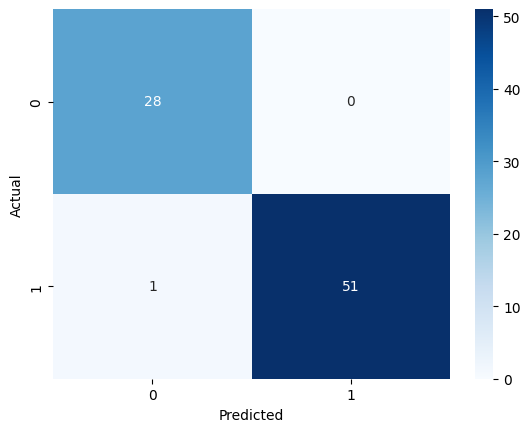

In [2882]:
cf = confusion_matrix(y_test, y_predknn)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

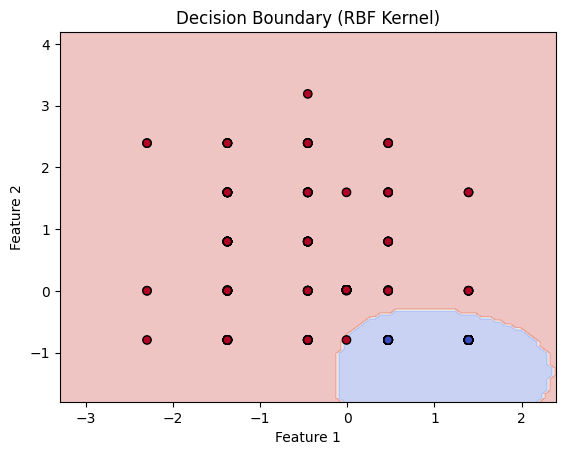

In [2883]:
import numpy as np


X_vis = X_train[:, :2]
y_vis = y_train

svm_vis = SVC(kernel='rbf', gamma='scale', C=1)
svm_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (RBF Kernel)")
plt.show()

SVM with L1

In [2884]:
from sklearn.svm import LinearSVC

In [2885]:
l1_svm=LinearSVC(penalty='l1',dual=False,C=1.0)
l1_svm.fit(X_train,y_train)

LinearSVC(dual=False, penalty='l1')

In [2886]:
y_pred_l1=l1_svm.predict(X_test)

In [2887]:
print(classification_report(y_test,y_pred_l1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



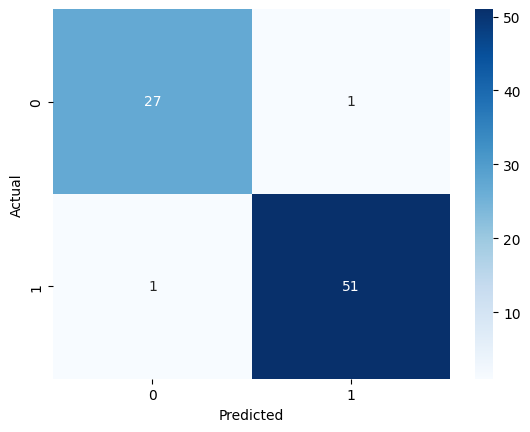

In [2888]:
cf = confusion_matrix(y_test, y_pred_l1)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LASSSO Feature Selection

In [2889]:
import numpy as np
feature_names = X.columns

In [2890]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.2, random_state=42)

In [2891]:
from sklearn.linear_model import Lasso, LogisticRegression

In [2892]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=0.1)

In [2893]:
selected_features = np.array(feature_names)[lasso.coef_ != 0][0]

In [2894]:
lasso_coefs = np.array(lasso.coef_)

selected_features = np.where(lasso_coefs != 0)[0] 

X_train_selected = X_train_lasso.iloc[:, selected_features]  
X_test_selected = X_test_lasso.iloc[:, selected_features]

print(f"Number of selected features: {X_train_selected.shape[1]}")

Number of selected features: 8


In [2895]:
X_train_selected = X_train_lasso.iloc[:, selected_features] 
X_test_selected = X_test_lasso.iloc[:, selected_features]

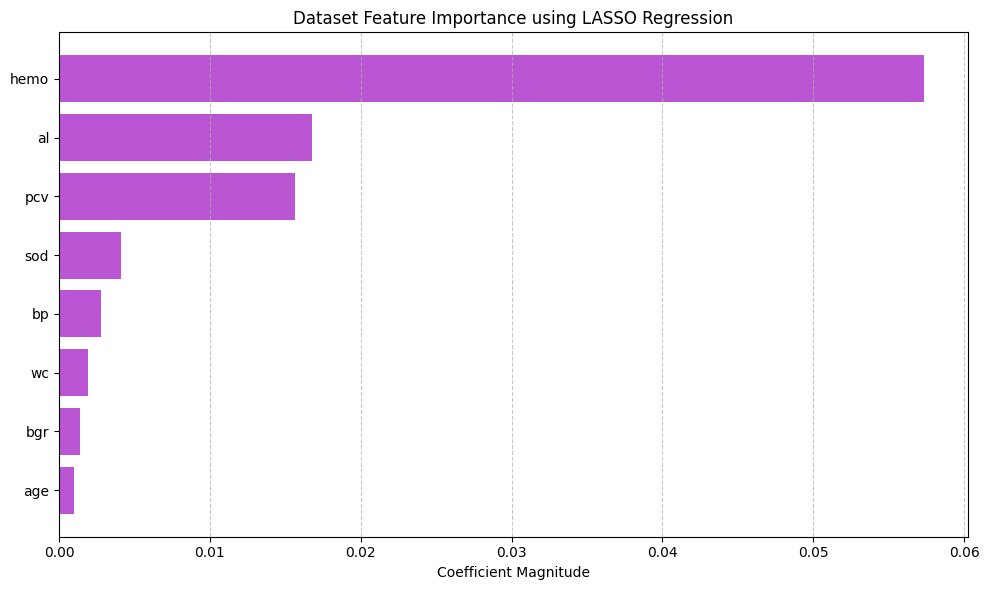

In [2896]:
lasso_coefs = lasso.coef_
feature_names = X_train_lasso.columns

nonzero_indices = np.where(lasso_coefs != 0)[0]
selected_feature = feature_names[nonzero_indices]
selected_coefs = lasso_coefs[nonzero_indices]

importance_df = pd.DataFrame({
    'Feature': selected_feature,
    'Coefficient': np.abs(selected_coefs)
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='mediumorchid')
plt.xlabel('Coefficient Magnitude')
plt.title('Dataset Feature Importance using LASSO Regression')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [2897]:
#scale = StandardScaler()
X_train_selected = scale.fit_transform(X_train_selected)
X_test_selected = scale.transform(X_test_selected)

ANN

In [2898]:
ann_model_lasso = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Input Layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(16, activation='relu'),  # Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer (Sigmoid for Binary Classification)
])

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2899]:
ann_model_lasso.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model_lasso.fit(X_train_selected, y_train_lasso, epochs=20, batch_size=32, validation_data=(X_test_selected, y_test_lasso), verbose=1)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3400 - loss: 0.8338 - val_accuracy: 0.3750 - val_loss: 0.7648
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4740 - loss: 0.7440 - val_accuracy: 0.5500 - val_loss: 0.6694
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5974 - loss: 0.6765 - val_accuracy: 0.7500 - val_loss: 0.5890
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7511 - loss: 0.5875 - val_accuracy: 0.8500 - val_loss: 0.5183
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8739 - loss: 0.5132 - val_accuracy: 0.9000 - val_loss: 0.4540
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8806 - loss: 0.4684 - val_accuracy: 0.9500 - val_loss: 0.3989
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8843 - loss: 0.4228 - val_accuracy: 0.9625 - val_loss: 0.3518
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9171 - loss: 0.3642 - val_accuracy: 0.9500 - val_loss

In [2900]:
y_pred = (ann_model_lasso.predict(X_test_selected) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [2901]:
print(classification_report(y_test_lasso, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



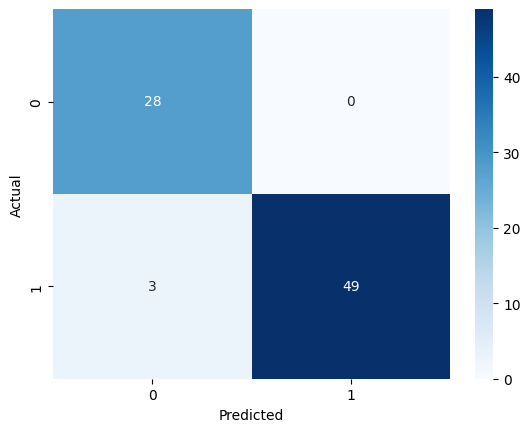

In [2902]:
cf_ann2 = confusion_matrix(y_test_lasso, y_pred)
sns.heatmap(cf_ann2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

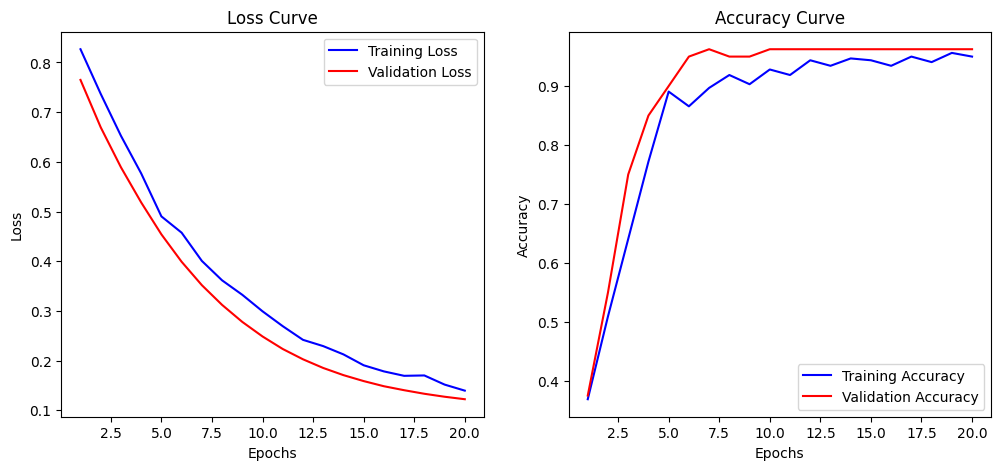

In [2903]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

Decision Tree

In [2904]:
tr_model_lasso = DecisionTreeClassifier(random_state=42)
tr_model_lasso.fit(X_train_selected, y_train_lasso)

DecisionTreeClassifier(random_state=42)

In [2905]:
y_pred_lasso_tr = tr_model_lasso.predict(X_test_selected)

In [2906]:
print(classification_report(y_test_lasso, y_pred_lasso_tr))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.96      0.96      0.96        52

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



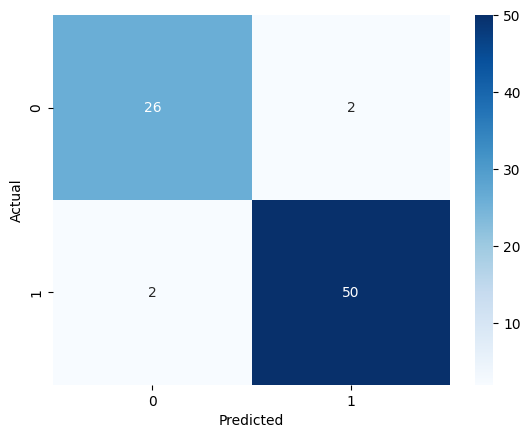

In [2907]:
cf = confusion_matrix(y_test_lasso, y_pred_lasso_tr)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN with LASSO

In [2908]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_selected, y_train_lasso)

KNeighborsClassifier(n_neighbors=1)

In [2909]:
y_predknn_LASSO = knn.predict(X_test_selected)

In [2910]:
print(classification_report(y_test_lasso,y_predknn_LASSO))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



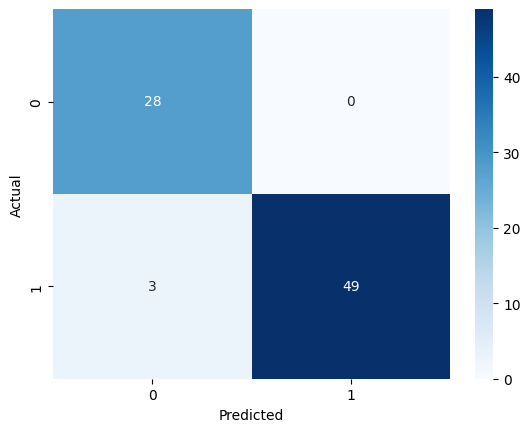

In [2911]:
cf = confusion_matrix(y_test_lasso, y_predknn_LASSO)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [2912]:
k_values = range(1, 21)
k_accuracies_lasso = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train_lasso)
    y_pred = knn.predict(X_test_selected)
    accuracy = accuracy_score(y_test_lasso, y_pred)
    k_accuracies_lasso.append(accuracy)

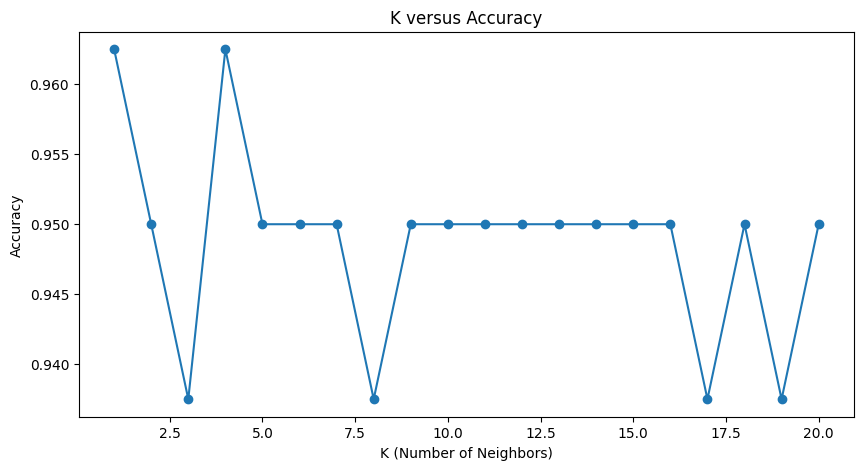

In [2913]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, k_accuracies_lasso, marker='o')
plt.title('K versus Accuracy')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

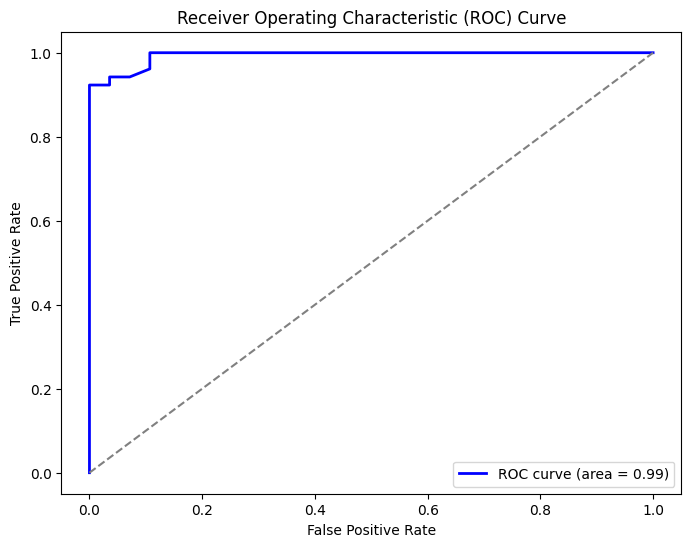

In [2914]:
fpr, tpr, _ = roc_curve(y_test_lasso, knn.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM on LASSO

In [2915]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    svm = SVC(kernel = kernel, gamma='scale', C=1)
    svm.fit(X_train_selected, y_train_lasso)
    y_pred = svm.predict(X_test_selected)
    accuracy = accuracy_score(y_test_lasso, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel : {accuracy:.4f}")

Accuracy with linear kernel : 0.9625
Accuracy with poly kernel : 0.9250
Accuracy with rbf kernel : 0.9625
Accuracy with sigmoid kernel : 0.9625


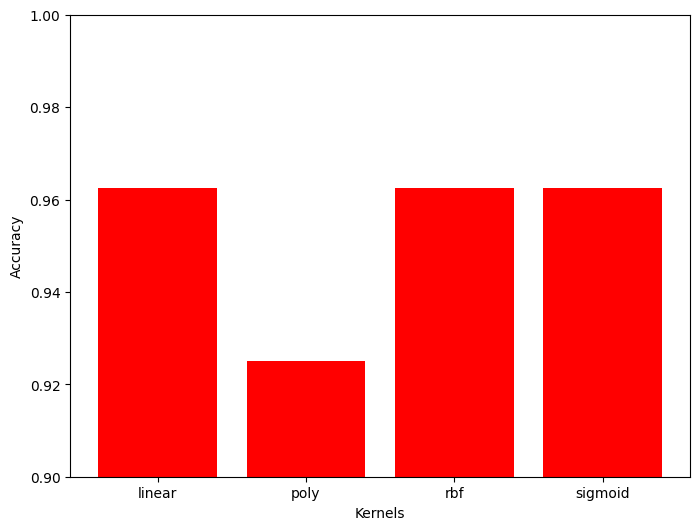

In [2916]:
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color='red')
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

In [2917]:
svm_model = SVC(kernel='linear',C=1.0,  gamma='scale')
svm_model.fit(X_train_selected, y_train_lasso)

SVC(kernel='linear')

In [2918]:
y_predsvm_LASSO = svm_model.predict(X_test_selected)

In [2919]:
print(classification_report(y_test_lasso,y_predsvm_LASSO))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.98      0.96      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



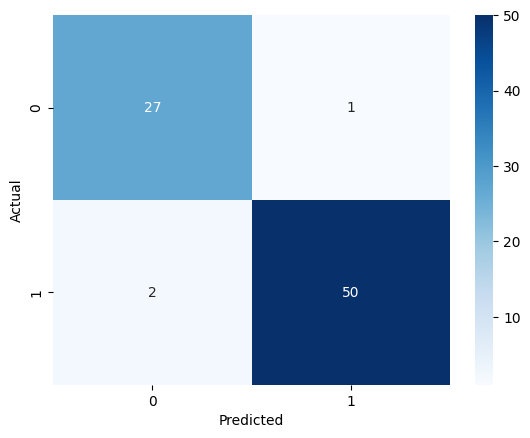

In [2920]:
cf = confusion_matrix(y_test_lasso, y_predsvm_LASSO)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

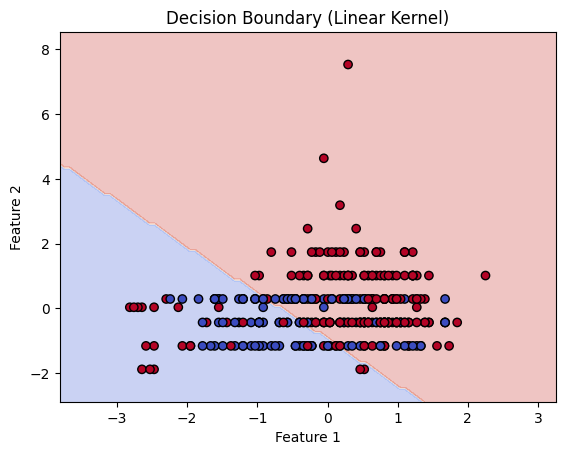

In [2921]:
X_vis = X_train_selected[:, :2]
y_vis = y_train_lasso

svm_vis = SVC(kernel='linear', gamma='scale', C=1)
svm_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Linear Kernel)")
plt.show()

SVM with L1

In [2922]:
l1_svm=LinearSVC(penalty='l1',dual=False,C=2.0)
l1_svm.fit(X_train_selected,y_train_lasso)

LinearSVC(C=2.0, dual=False, penalty='l1')

In [2923]:
y_pred_l1_LASSO=l1_svm.predict(X_test_selected)

In [2924]:
print(classification_report(y_test_lasso,y_pred_l1_LASSO))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



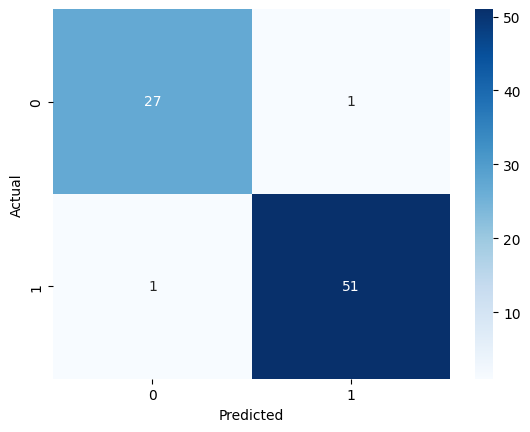

In [2925]:
cf = confusion_matrix(y_test_lasso, y_pred_l1_LASSO)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Wrapper Method

In [2926]:
from sklearn.feature_selection import SequentialFeatureSelector
X_train_frd, X_test_frd, y_train_frd, y_test_frd = train_test_split(X, y, test_size=0.2, random_state=42)

In [2927]:
#scale2 = StandardScaler()
X_train_frd = scale.fit_transform(X_train_frd)
X_test_frd = scale.transform(X_test_frd)

ANN

In [2928]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=1000)
ffs = SequentialFeatureSelector(mlp, direction='forward', tol = 0.001)
ffs.fit(X_train_frd, y_train_frd)

SequentialFeatureSelector(estimator=MLPClassifier(hidden_layer_sizes=(32, 16),
                                                  max_iter=1000),
                          tol=0.001)

In [2929]:
selected_features = ffs.get_support()
X_train_selected = ffs.transform(X_train_frd)
X_test_selected = ffs.transform(X_test_frd)

print("Selected Features:", np.where(selected_features)[0])

Selected Features: [ 2  9 12 14 17 22]


In [2930]:
mlp.fit(X_train_selected, y_train_frd)

MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000)

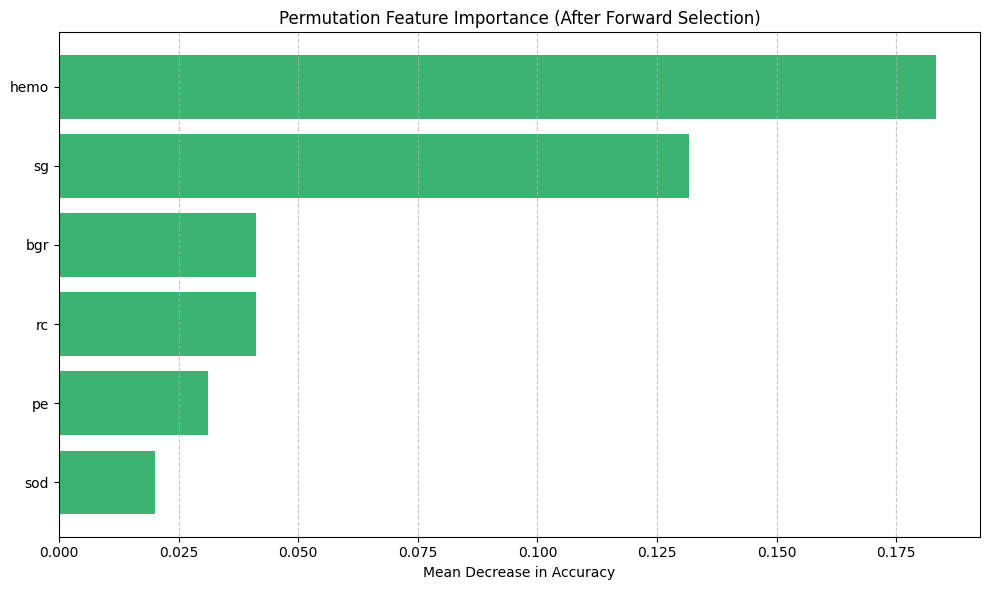

In [2931]:
from sklearn.inspection import permutation_importance
selected_indices = np.where(ffs.get_support())[0]
selected_feature_names = X.columns[selected_indices]

result = permutation_importance(mlp, X_test_selected, y_test_frd, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='mediumseagreen')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance (After Forward Selection)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ANN


In [2932]:
def build_ann_model(input_shape):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [2933]:
ann_model = build_ann_model(X_train_selected.shape[1])
ann_model.fit(X_train_selected, y_train_frd, epochs=20, batch_size=32, validation_data=(X_test_selected, y_test_frd), verbose=1)

Epoch 1/20


C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5615 - loss: 0.7167 - val_accuracy: 0.7375 - val_loss: 0.6501
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7421 - loss: 0.6402 - val_accuracy: 0.9000 - val_loss: 0.5824
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8676 - loss: 0.5824 - val_accuracy: 0.9625 - val_loss: 0.5260
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9376 - loss: 0.5286 - val_accuracy: 0.9875 - val_loss: 0.4750
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9347 - loss: 0.4835 - val_accuracy: 0.9875 - val_loss: 0.4261
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9222 - loss: 0.4441 - val_accuracy: 0.9750 - val_loss: 0.3792
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9518 - loss: 0.3779 - val_accuracy: 0.9750 - val_loss: 0.3336
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9553 - loss: 0.3521 - val_accuracy: 0.9625 - val_loss: 0.2931
Ep

In [2934]:
y_pred = (ann_model.predict(X_test_selected) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [2935]:
print(classification_report(y_test_frd, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



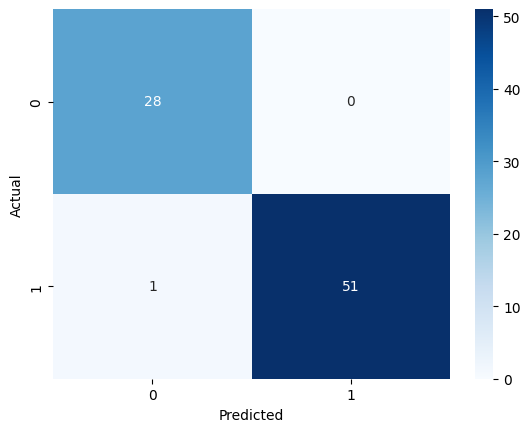

In [2936]:
cf_ann3 = confusion_matrix(y_test_frd, y_pred)
sns.heatmap(cf_ann3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

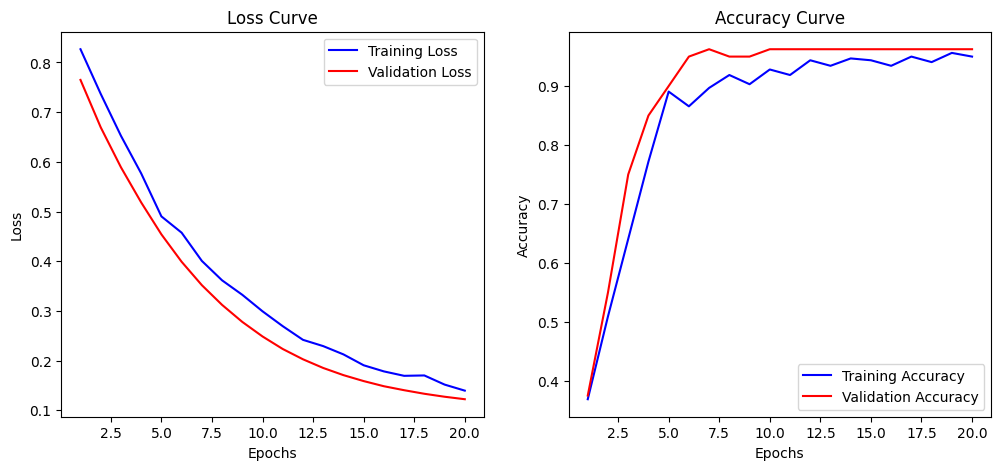

In [2937]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

Decision Tree

In [2938]:
tr_frd = DecisionTreeClassifier(random_state=42)

In [2939]:
ffs = SequentialFeatureSelector(tr_frd, direction='forward', tol = 0.001)
ffs.fit(X_train_frd, y_train_frd)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=42),
                          tol=0.001)

In [2940]:
selected_features = ffs.get_support()
print("Selected Features (True indicates inclusion):", selected_features)

Selected Features (True indicates inclusion): [False False False False  True False False False False False False False
 False False  True False False False  True  True False False False False]


In [2941]:
X_train_selected_ffs = ffs.transform(X_train_frd)
X_test_selected_ffs = ffs.transform(X_test_frd)

In [2942]:
tr_frd.fit(X_train_selected_ffs, y_train_frd)

DecisionTreeClassifier(random_state=42)

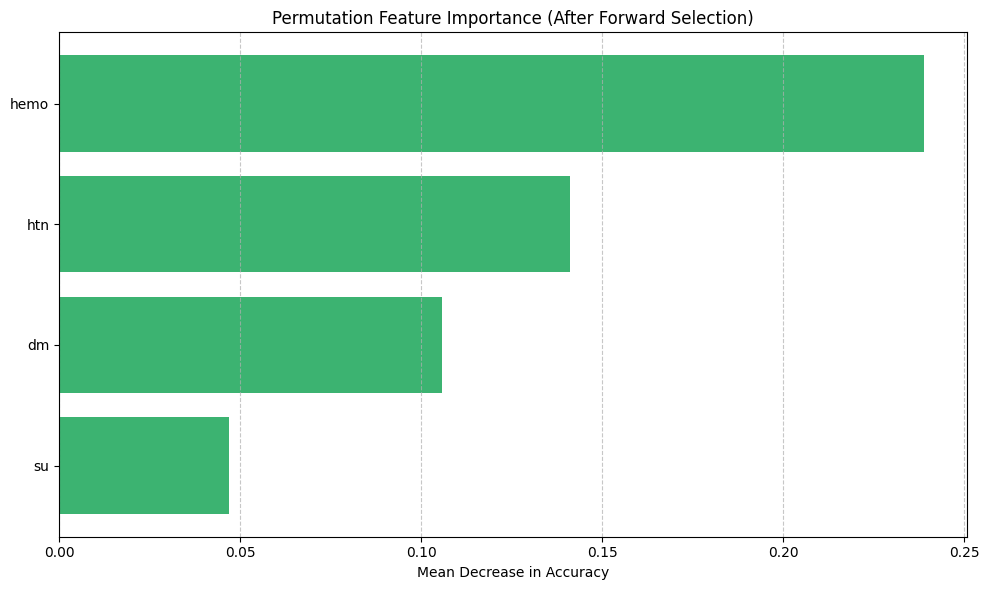

In [2943]:

selected_indices = np.where(ffs.get_support())[0]
selected_feature_names = X.columns[selected_indices]

result = permutation_importance(tr_frd, X_test_selected_ffs, y_test_frd, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='mediumseagreen')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance (After Forward Selection)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2944]:
dc_tre = DecisionTreeClassifier(random_state=42)
dc_tre.fit(X_train_selected_ffs, y_train_frd)

DecisionTreeClassifier(random_state=42)

In [2945]:
y_pred_tr_ffs = dc_tre.predict(X_test_selected_ffs)

In [2946]:
print(classification_report(y_test_frd, y_pred_tr_ffs))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



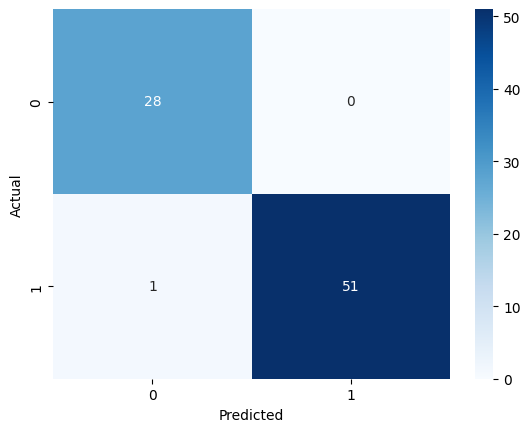

In [2947]:
cf_ffs = confusion_matrix(y_test_frd, y_pred_tr_ffs)
sns.heatmap(cf_ffs, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN

In [2948]:
knn_ffs = KNeighborsClassifier(n_neighbors=3)

In [2949]:
ffs_knn = SequentialFeatureSelector(knn_ffs, direction='forward', tol=0.001)
ffs_knn.fit(X_train_frd, y_train_frd)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          tol=0.001)

In [2950]:
selected_features = ffs_knn.get_support()
print("Selected Features (True indicates inclusion):", selected_features)

Selected Features (True indicates inclusion): [False False  True  True  True False  True False False False False  True
  True False  True False False False  True False False False False False]


In [2951]:
X_train_selected_knn = ffs_knn.transform(X_train_frd)
X_test_selected_knn = ffs_knn.transform(X_test_frd)

In [2952]:
knn_ffs.fit(X_train_selected_knn, y_train_frd)

KNeighborsClassifier(n_neighbors=3)

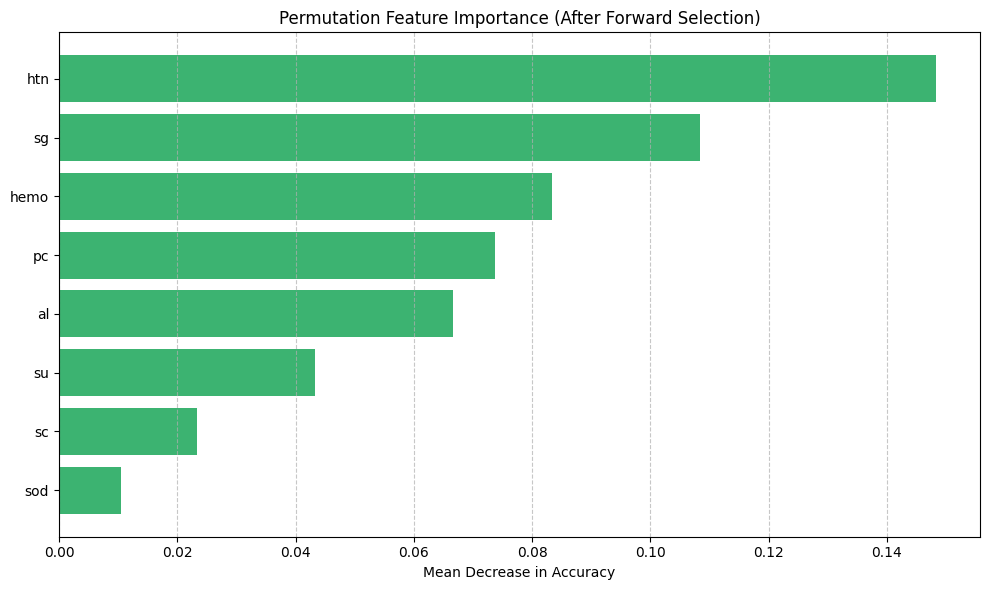

In [2953]:

selected_indices = np.where(ffs_knn.get_support())[0]
selected_feature_names = X.columns[selected_indices]

result = permutation_importance(knn_ffs, X_test_selected_knn, y_test_frd, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='mediumseagreen')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance (After Forward Selection)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2954]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_selected_knn, y_train_frd)

KNeighborsClassifier(n_neighbors=1)

In [2955]:
y_pred_knn = knn1.predict(X_test_selected_knn)

In [2956]:
print(classification_report(y_test_frd, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



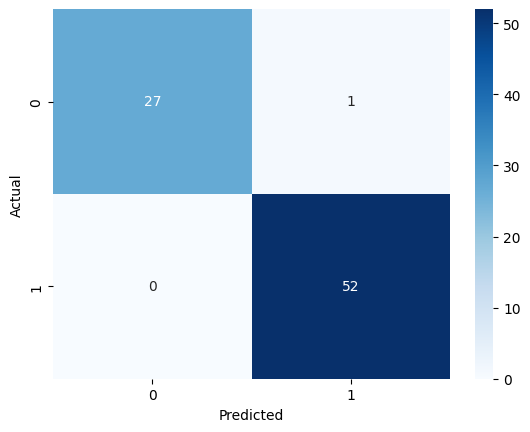

In [2957]:
cf_knn = confusion_matrix(y_test_frd, y_pred_knn)
sns.heatmap(cf_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [2958]:
k_values = range(1, 21)
k_accuracies_wfs = []
for k in k_values:
    knn_wfs = KNeighborsClassifier(n_neighbors=k)
    knn_wfs.fit(X_train_selected_knn, y_train_frd)
    y_pred = knn_wfs.predict(X_test_selected_knn)
    accuracy = accuracy_score(y_test_frd, y_pred)
    k_accuracies_wfs.append(accuracy)

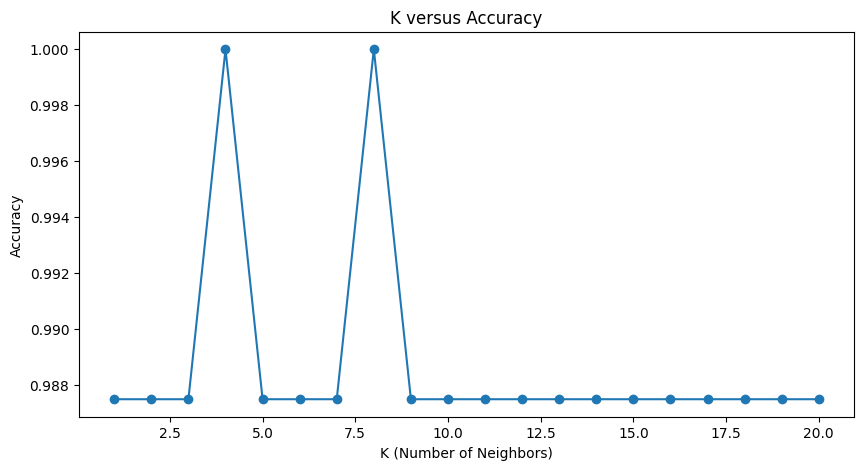

In [2959]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, k_accuracies_wfs, marker='o')
plt.title('K versus Accuracy')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

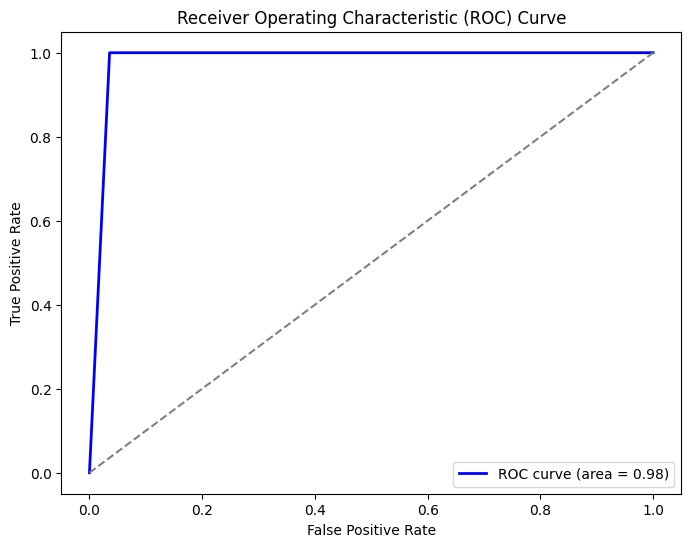

In [2960]:
fpr, tpr, _ = roc_curve(y_test_frd, knn1.predict_proba(X_test_selected_knn)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM

In [2961]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

Kernel: linear
Selected Features: [ 2  3  9 11 14 17 21]
Accuracy: 0.9750



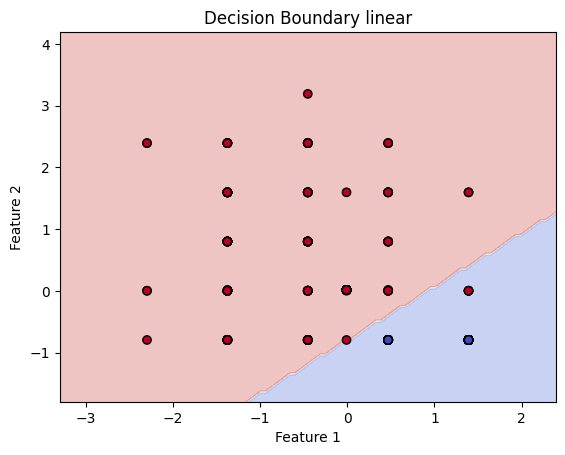

Kernel: poly
Selected Features: [ 2  3  4 22]
Accuracy: 0.9500



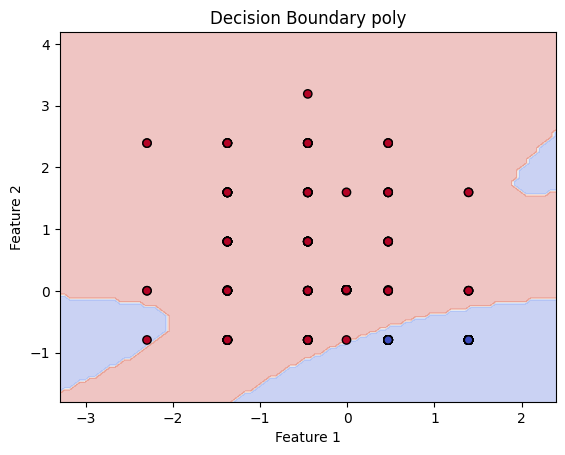

Kernel: rbf
Selected Features: [ 1  2 12 14 22]
Accuracy: 0.9625



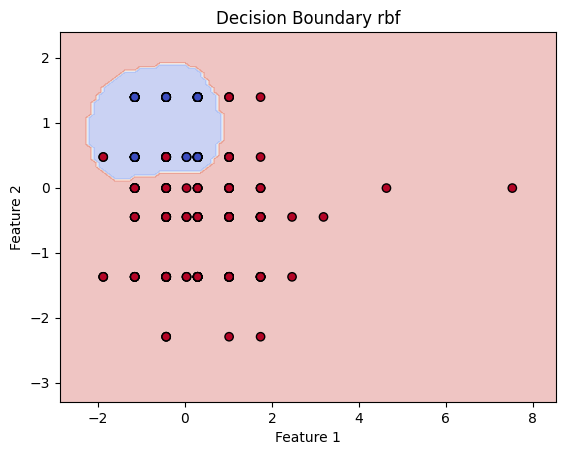

Kernel: sigmoid
Selected Features: [ 2  4  9 12 14 18 21 22]
Accuracy: 0.9750



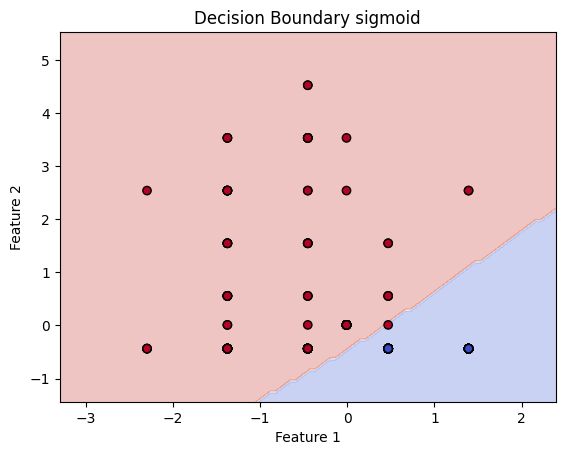

Best Kernel: linear with Accuracy: 0.9750


In [2962]:
for kernel in kernels:
    svm = SVC(kernel=kernel, gamma='scale', C=1)
    
    ffs = SequentialFeatureSelector(svm, direction='forward', tol = 0.001)
    ffs.fit(X_train_frd, y_train_frd)

    X_train_selected = ffs.transform(X_train_frd)
    X_test_selected = ffs.transform(X_test_frd)

    svm.fit(X_train_selected, y_train_frd)
    y_pred = svm.predict(X_test_selected)

    accuracy = accuracy_score(y_test_frd, y_pred)
    accuracies.append(accuracy)

    selected_feature_indices = np.where(ffs.get_support())[0]
    print(f"Kernel: {kernel}")
    print(f"Selected Features: {selected_feature_indices}")
    print(f"Accuracy: {accuracy:.4f}\n")

    X_vis = X_train_selected[:, :2]
    y_vis = y_train_frd

    svm_vis = SVC(kernel=kernel, gamma='scale', C=1)
    svm_vis.fit(X_vis, y_vis)

    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Boundary {kernel}")
    plt.show()

best_kernel_index = np.argmax(accuracies)
print(f"Best Kernel: {kernels[best_kernel_index]} with Accuracy: {accuracies[best_kernel_index]:.4f}")



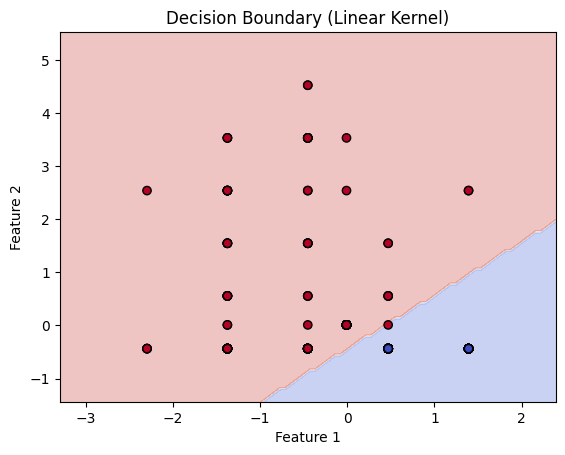

In [2963]:
X_vis = X_train_selected[:, :2]
y_vis = y_train_frd

svm_vis = SVC(kernel='linear', gamma='scale', C=1)
svm_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Linear Kernel)")
plt.show()

In [2964]:
svm_l1_frd = LinearSVC(penalty='l1', dual=False, C=1.0)
ffs = SequentialFeatureSelector(svm_l1_frd,  direction='forward', tol=0.001)
ffs.fit(X_train_frd, y_train_frd)
X_train_ffs = ffs.transform(X_train_frd)
X_test_ffs = ffs.transform(X_test_frd)

In [2965]:
svm_l1_ffs = LinearSVC(penalty='l1', dual=False, C=2.0)
svm_l1_ffs.fit(X_train_ffs, y_train_frd)

LinearSVC(C=2.0, dual=False, penalty='l1')

In [2966]:
y_pred_l1_ffs = svm_l1_ffs.predict(X_test_ffs)

In [2967]:
print(classification_report(y_test_frd, y_pred_l1_ffs))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



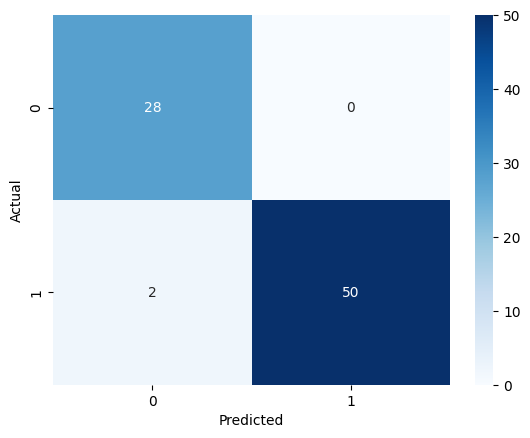

In [2968]:
cf_l1 = confusion_matrix(y_test_frd, y_pred_l1_ffs)
sns.heatmap(cf_l1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

REVIEW-2

In [2969]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [2970]:
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005000,4.000000,0.000000,1,0,1,0,117.0,...,11.2,20,62,19,1,3,1,1,1,1
18,60.0,100.0,1.025000,0.000000,3.000000,1,1,0,0,263.0,...,12.7,25,13,24,1,4,2,0,0,0
202,78.0,60.0,1.017408,1.016949,0.450142,1,1,0,0,114.0,...,8.0,12,90,34,0,4,1,0,0,1
250,40.0,80.0,1.025000,0.000000,0.000000,1,1,0,0,140.0,...,15.0,36,5,26,0,3,1,0,0,0
274,19.0,80.0,1.020000,0.000000,0.000000,1,1,0,0,107.0,...,14.4,32,90,34,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,60.0,1.010000,1.000000,0.000000,1,1,0,0,163.0,...,9.8,16,27,12,1,4,1,0,0,0
106,50.0,90.0,1.017408,1.016949,0.450142,1,1,0,0,89.0,...,6.0,5,60,34,1,4,1,0,1,1
270,23.0,80.0,1.025000,0.000000,0.000000,1,1,0,0,111.0,...,14.3,29,67,32,0,3,1,0,0,0
348,38.0,80.0,1.020000,0.000000,0.000000,1,1,0,0,99.0,...,13.6,32,68,46,0,3,1,0,0,0


Without Balancing

In [2971]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2972]:
feature_names = X.columns

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Decision Tree

In [2973]:
from sklearn.tree import DecisionTreeClassifier
tr_model = DecisionTreeClassifier(random_state=42)
tr_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [2974]:
y_pred=tr_model.predict(X_test_scaled)

In [2975]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



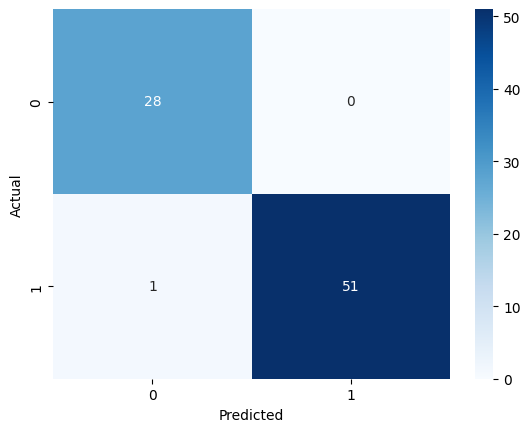

In [2976]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

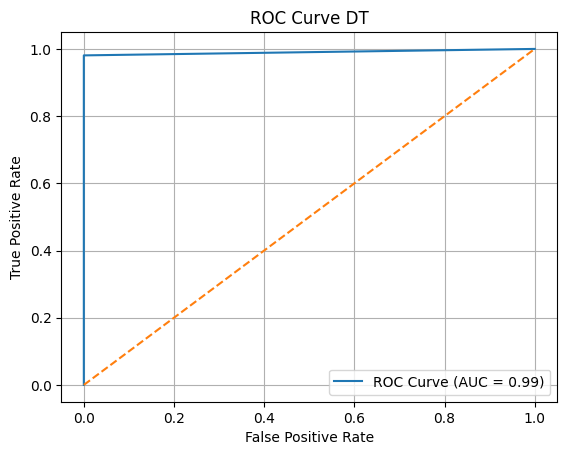

In [2977]:
from sklearn.metrics import roc_curve, auc

y_prob = tr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend()
plt.grid()
plt.show()

KNN

In [2978]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [2979]:
y_predknn_full=knn.predict(X_test_scaled)

In [2980]:
print(classification_report(y_test,y_predknn_full))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



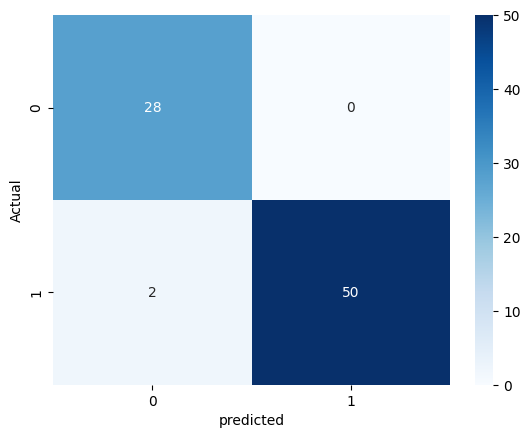

In [2981]:
cf_knn=confusion_matrix(y_test,y_predknn_full)
sns.heatmap(cf_knn,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

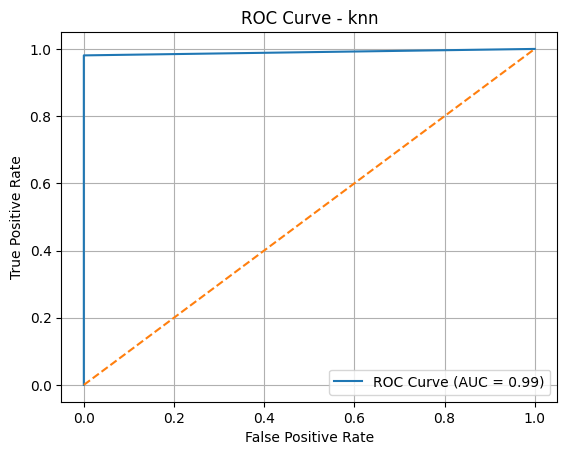

In [2982]:
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - knn')
plt.legend()
plt.grid()
plt.show()


ANN

In [2983]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2984]:
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2985]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6780 - loss: 0.6164 - val_accuracy: 0.9125 - val_loss: 0.4962
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7865 - loss: 0.5290 - val_accuracy: 0.9625 - val_loss: 0.3988
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8567 - loss: 0.4352 - val_accuracy: 0.9625 - val_loss: 0.3298
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8886 - loss: 0.3951 - val_accuracy: 0.9625 - val_loss: 0.2773
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9308 - loss: 0.3400 - val_accuracy: 0.9750 - val_loss: 0.2335
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9387 - loss: 0.2848 - val_accuracy: 0.9875 - val_loss: 0.1963
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9354 - loss: 0.2767 - val_accuracy: 0.9750 - val_loss: 0.1653
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9795 - loss: 0.2175 - val_accuracy: 0.9750 - val_l

In [2986]:
y_pred_ann=(ann_model.predict(X_test_scaled)>0.5).astype("int")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [2987]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



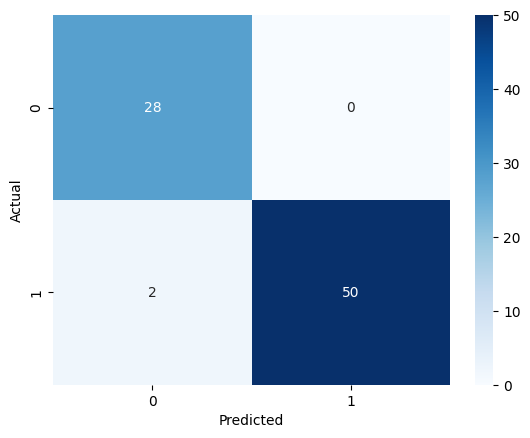

In [2988]:
cf_ann=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(cf_ann,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

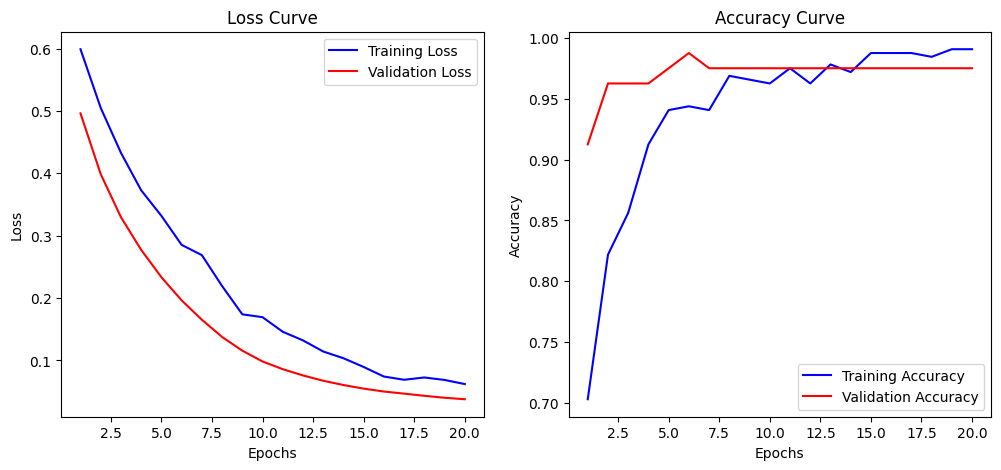

In [2989]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

SVM

In [2990]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    svm = SVC(kernel = kernel, gamma='scale', C=1)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_svm)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel : {accuracy:.4f}")

Accuracy with linear kernel : 0.9875
Accuracy with poly kernel : 0.9875
Accuracy with rbf kernel : 0.9875
Accuracy with sigmoid kernel : 0.9875


In [2991]:
svm_linear=SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled,y_train)

SVC(kernel='linear', probability=True)

In [2992]:
y_pred_linearsvm=svm_linear.predict(X_test_scaled)

In [2993]:
print(classification_report(y_test,y_pred_linearsvm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



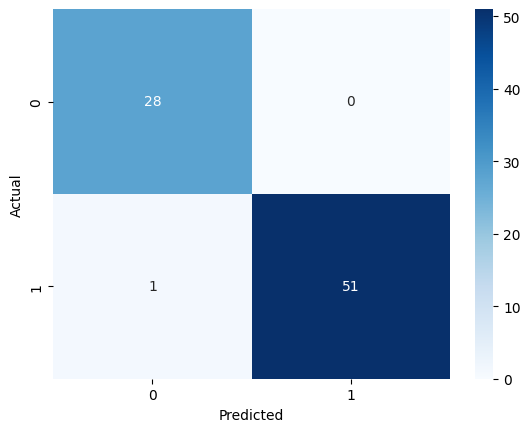

In [2994]:
cf_linearsvm = confusion_matrix(y_test, y_pred_linearsvm)
sns.heatmap(cf_linearsvm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


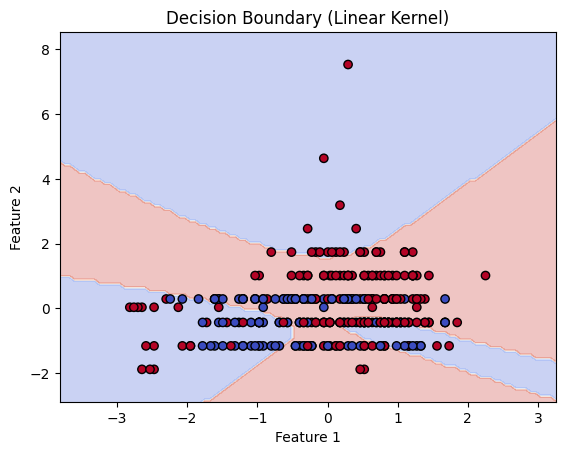

In [2995]:
X_vis = X_train_scaled.iloc[:, :2]  # Use iloc for positional slicing
y_vis = y_train

svm_vis = SVC(kernel='sigmoid', gamma='scale', C=1)
svm_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Linear Kernel)")
plt.show()

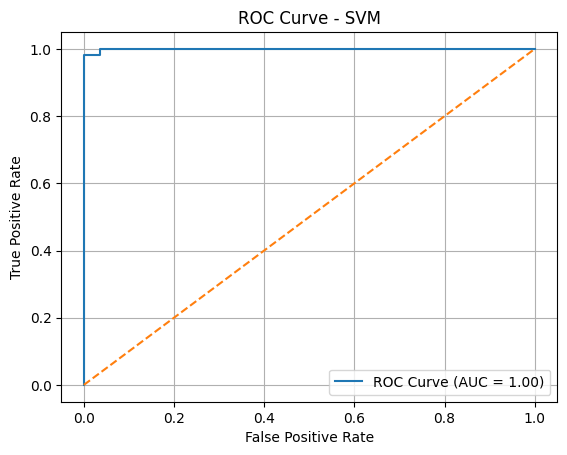

In [2996]:
from sklearn.metrics import roc_curve, auc

y_prob = svm_linear.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid()
plt.show()

ADYSON

In [2997]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [2998]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2999]:
feature_names = X.columns

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [3000]:
adasyn = ADASYN(random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({1: 198, 0: 122})
Resampled dataset shape: Counter({1: 198, 0: 197})


Decision Tree

In [3001]:
from sklearn.tree import DecisionTreeClassifier
tr_model = DecisionTreeClassifier(random_state=42)
tr_model.fit(x_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [3002]:
y_pred = tr_model.predict(X_test_scaled)

In [3003]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.96      0.96      0.96        52

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



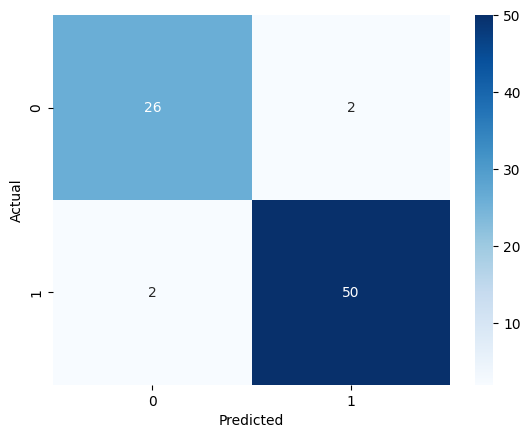

In [3004]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

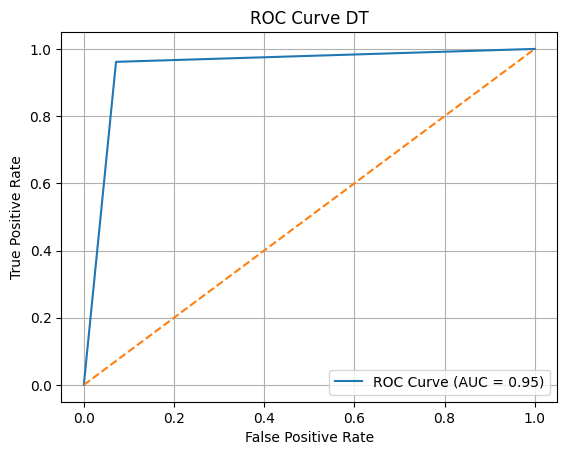

In [3005]:
from sklearn.metrics import roc_curve, auc

y_prob = tr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend()
plt.grid()
plt.show()

KNN

In [3006]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_resampled, y_resampled)

KNeighborsClassifier()

In [3007]:
y_predknn_full=knn.predict(X_test_scaled)

In [3008]:
print(classification_report(y_test,y_predknn_full))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



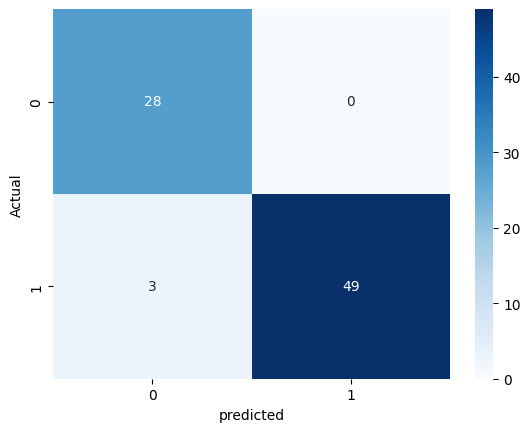

In [3009]:
cf_knn=confusion_matrix(y_test,y_predknn_full)
sns.heatmap(cf_knn,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

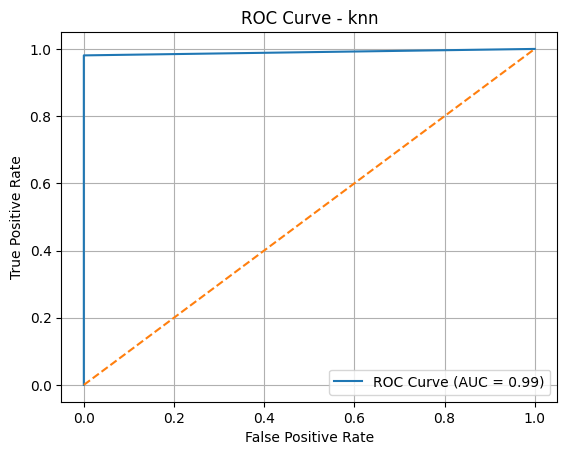

In [3010]:
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - knn')
plt.legend()
plt.grid()
plt.show()


ANN

In [3011]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [3012]:
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(x_resampled.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3013]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(x_resampled, y_resampled, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4755 - loss: 0.7032 - val_accuracy: 0.7875 - val_loss: 0.5060
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6627 - loss: 0.5517 - val_accuracy: 0.9250 - val_loss: 0.4151
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8888 - loss: 0.4615 - val_accuracy: 0.9250 - val_loss: 0.3458
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8902 - loss: 0.4160 - val_accuracy: 0.9250 - val_loss: 0.2874
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9148 - loss: 0.3576 - val_accuracy: 0.9250 - val_loss: 0.2392
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9451 - loss: 0.2974 - val_accuracy: 0.9500 - val_loss: 0.2020
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9391 - loss: 0.2441 - val_accuracy: 0.9500 - val_loss: 0.1751
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9485 - loss: 0.2109 - val_accuracy: 0.9500 - val_loss

In [3014]:
y_pred_ann=(ann_model.predict(X_test_scaled)>0.5).astype("int")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [3015]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



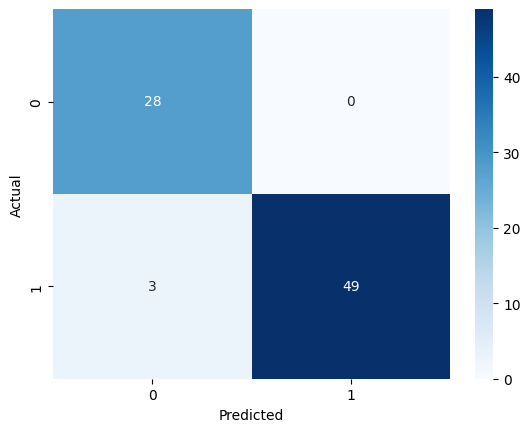

In [3016]:
cf_ann=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(cf_ann,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

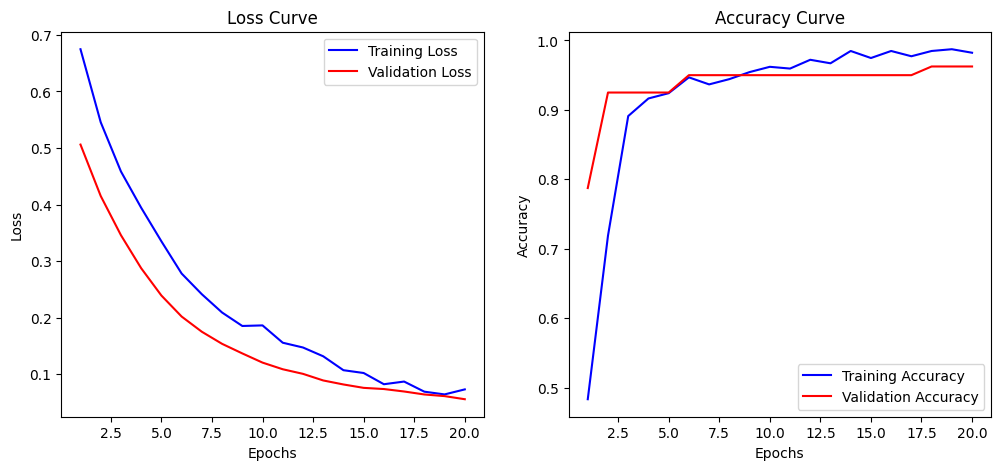

In [3017]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

SVM

In [3018]:
from sklearn.svm import SVC

In [3019]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    svm = SVC(kernel = kernel, gamma='scale', C=1)
    svm.fit(x_resampled, y_resampled)
    y_pred_svm = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_svm)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel : {accuracy:.4f}")

Accuracy with linear kernel : 0.9875
Accuracy with poly kernel : 0.9625
Accuracy with rbf kernel : 0.9875
Accuracy with sigmoid kernel : 0.9750


In [3020]:
svm_linear=SVC(kernel='linear', probability=True)
svm_linear.fit(x_resampled,y_resampled)

SVC(kernel='linear', probability=True)

In [3021]:
y_pred_linearsvm=svm_linear.predict(X_test_scaled)

In [3022]:
print(classification_report(y_test,y_pred_linearsvm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



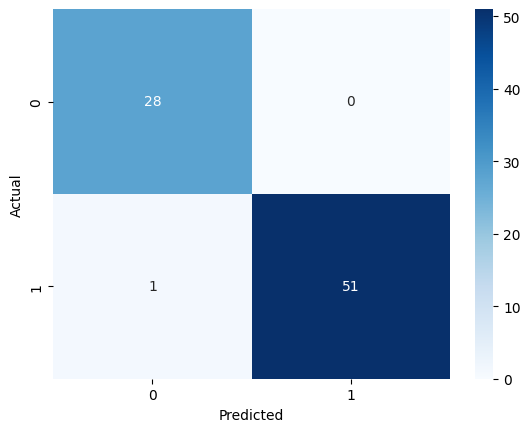

In [3023]:
cf_linearsvm = confusion_matrix(y_test, y_pred_linearsvm)
sns.heatmap(cf_linearsvm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


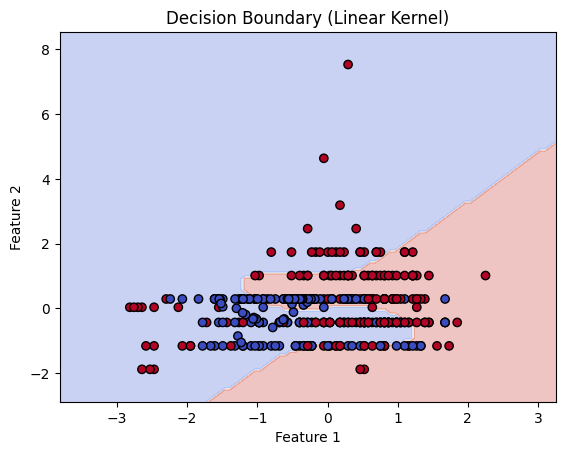

In [3024]:
X_vis = x_resampled.iloc[:, :2]  # Use iloc for positional slicing
y_vis = y_resampled

svm_vis = SVC(kernel='sigmoid', gamma='scale', C=1)
svm_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Linear Kernel)")
plt.show()

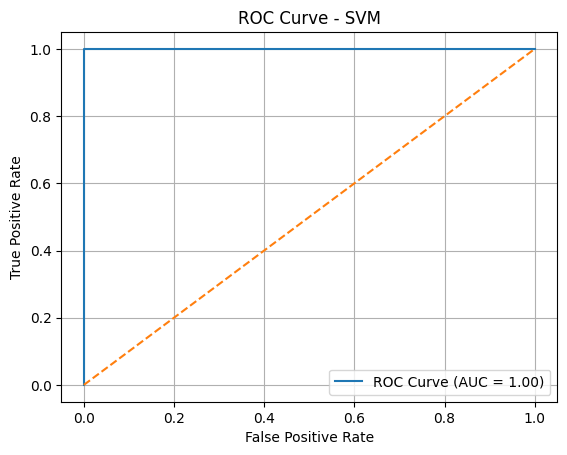

In [3025]:
from sklearn.metrics import roc_curve, auc

y_prob = svm_linear.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid()
plt.show()

SMOTE(Full Feature selection)

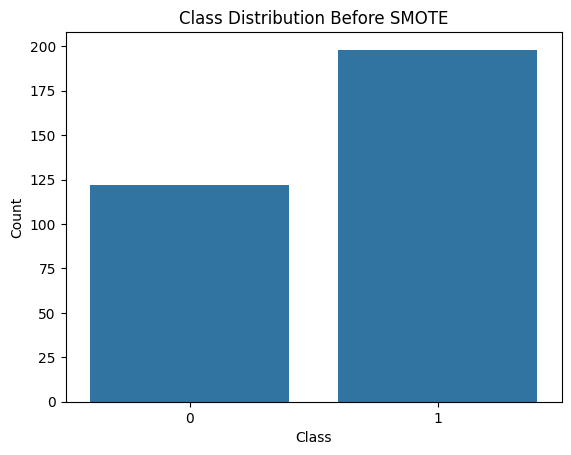

In [3026]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [3027]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



In [3028]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3029]:
feature_names = X.columns

# After SMOTE and scaling (assuming X_train_scaled and X_test_scaled are NumPy arrays)
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

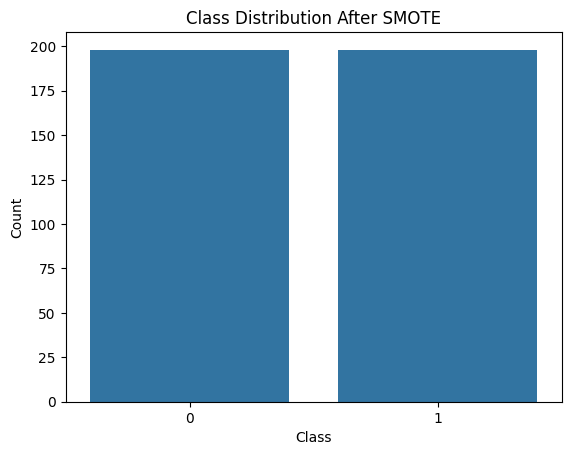

In [3030]:
sns.countplot(x=y_train)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Decision Tree Classifier

In [3031]:
from sklearn.tree import DecisionTreeClassifier
tr_model = DecisionTreeClassifier(random_state=42)
tr_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3032]:
y_pred=tr_model.predict(X_test)

In [3033]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



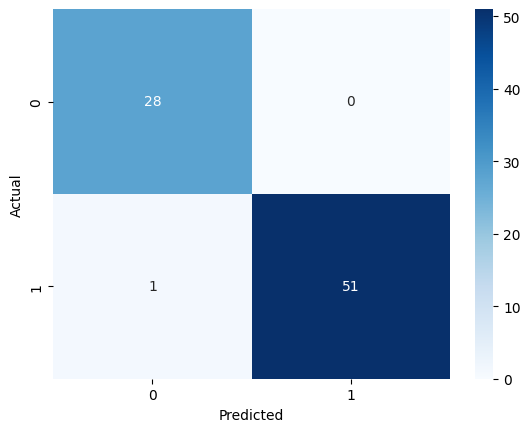

In [3034]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

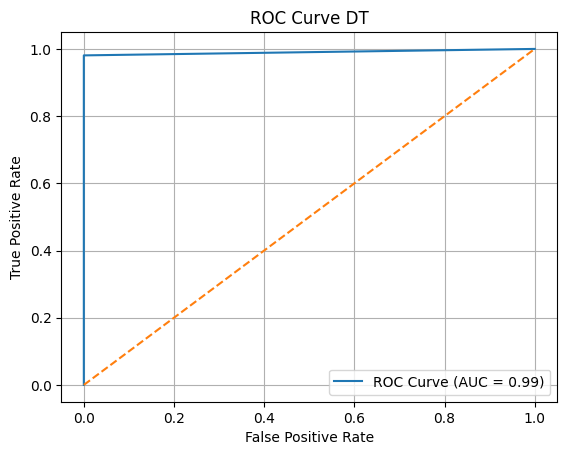

In [3035]:
from sklearn.metrics import roc_curve, auc

y_prob = tr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend()
plt.grid()
plt.show()

KNN Classifier

In [3036]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [3037]:
y_predknn_full=knn.predict(X_test)

In [3038]:
print(classification_report(y_test,y_predknn_full))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



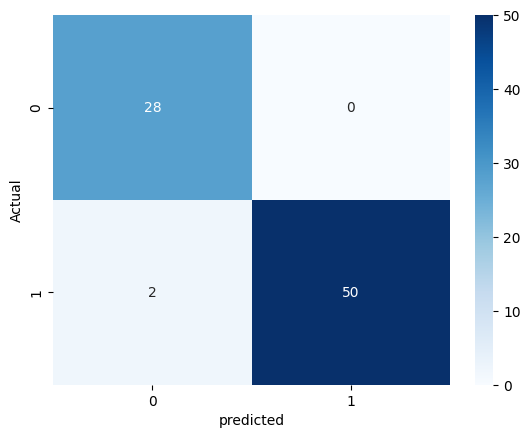

In [3039]:
cf_knn=confusion_matrix(y_test,y_predknn_full)
sns.heatmap(cf_knn,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [3040]:
from sklearn.metrics import accuracy_score
k_values = range(1, 21)
k_accuracies = []
for k in k_values:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    y_predknn_full = knn2.predict(X_test)
    accuracy = accuracy_score(y_test, y_predknn_full)
    k_accuracies.append(accuracy)

In [3041]:
from sklearn.metrics import accuracy_score
k_values = range(1, 21)
k_accuracies = []
for k in k_values:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    y_predknn_full = knn2.predict(X_test)
    accuracy = accuracy_score(y_test, y_predknn_full)
    k_accuracies.append(accuracy)

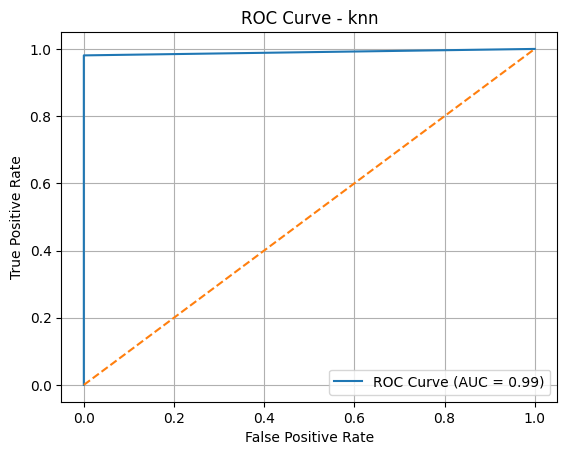

In [3042]:
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - knn')
plt.legend()
plt.grid()
plt.show()


ANN

In [3043]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [3044]:
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3045]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6569 - loss: 0.6786 - val_accuracy: 0.8625 - val_loss: 0.5257
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8319 - loss: 0.5273 - val_accuracy: 0.9375 - val_loss: 0.4001
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8819 - loss: 0.4455 - val_accuracy: 0.9500 - val_loss: 0.3141
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9434 - loss: 0.3584 - val_accuracy: 0.9500 - val_loss: 0.2510
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9564 - loss: 0.2935 - val_accuracy: 0.9750 - val_loss: 0.2001
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9462 - loss: 0.2605 - val_accuracy: 0.9750 - val_loss: 0.1595
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9573 - loss: 0.2088 - val_accuracy: 0.9750 - val_loss: 0.1284
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9676 - loss: 0.1743 - val_accuracy: 0.9750 - val_loss

In [3046]:
y_pred_ann=(ann_model.predict(X_test)>0.5).astype("int")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [3047]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



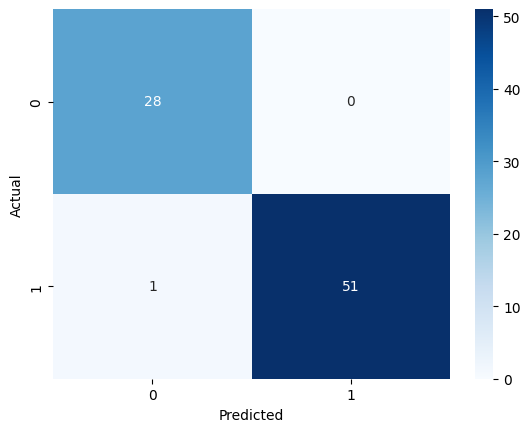

In [3048]:
cf_ann=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(cf_ann,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

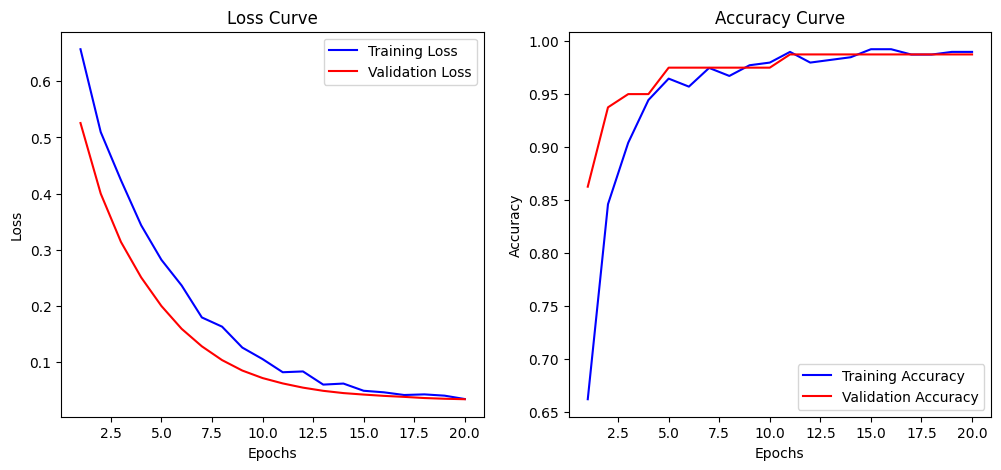

In [3049]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label="Training Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

SVM

In [3050]:
from sklearn.svm import SVC

In [3051]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    svm = SVC(kernel = kernel, gamma='scale', C=1)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_svm)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel : {accuracy:.4f}")

Accuracy with linear kernel : 0.9875
Accuracy with poly kernel : 0.9000
Accuracy with rbf kernel : 0.9875
Accuracy with sigmoid kernel : 0.9750


In [3052]:
svm_linear=SVC(kernel='linear', probability=True)
svm_linear.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [3053]:
y_pred_linearsvm=svm_linear.predict(X_test)

In [3054]:
print(classification_report(y_test,y_pred_linearsvm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



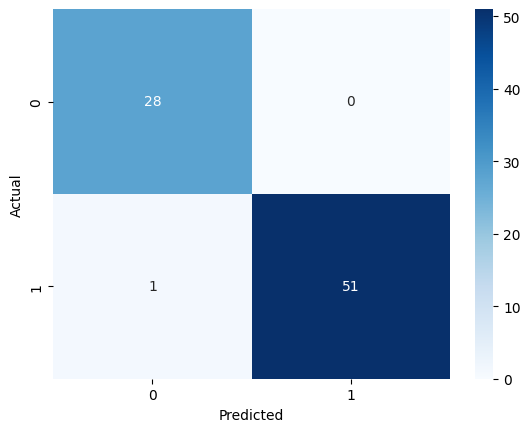

In [3055]:
cf_linearsvm = confusion_matrix(y_test, y_pred_linearsvm)
sns.heatmap(cf_linearsvm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


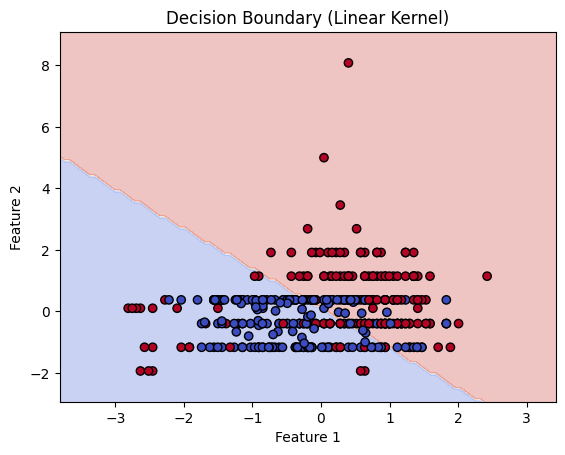

In [3056]:
X_vis = X_train.iloc[:, :2]  # Use iloc for positional slicing
y_vis = y_train

svm_vis = SVC(kernel='linear', gamma='scale', C=1)
svm_vis.fit(X_vis, y_vis)

x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Linear Kernel)")
plt.show()

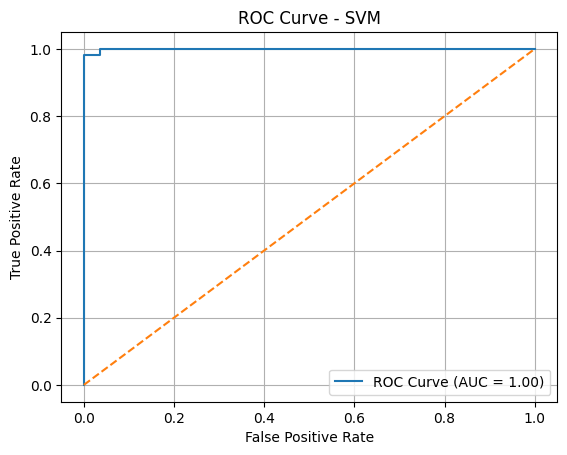

In [3057]:
from sklearn.metrics import roc_curve, auc

y_prob = svm_linear.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid()
plt.show()

SVM with l1

In [3058]:
l1_svm=LinearSVC(penalty='l1',dual=False,C=1.0)

l1_svm.fit(X_train,y_train)

LinearSVC(dual=False, penalty='l1')

In [3059]:
y_pred_l1=l1_svm.predict(X_test)

In [3060]:
print(classification_report(y_test,y_pred_l1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



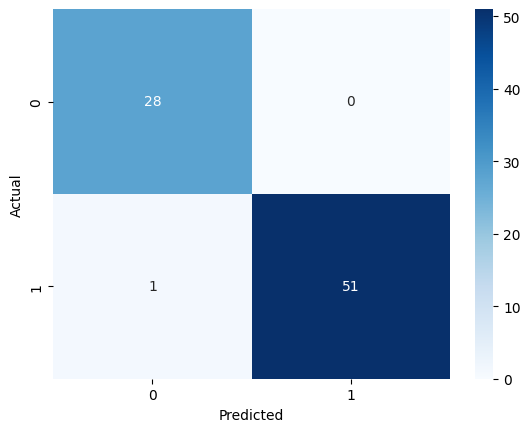

In [3061]:
cf = confusion_matrix(y_test, y_pred_l1)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Bagging

Random Tree

In [3062]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=30, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



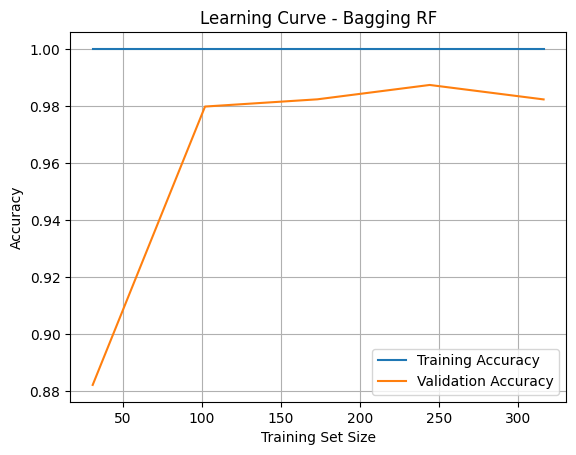

In [3063]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Bagging RF')
plt.legend()
plt.grid(True)
plt.show()

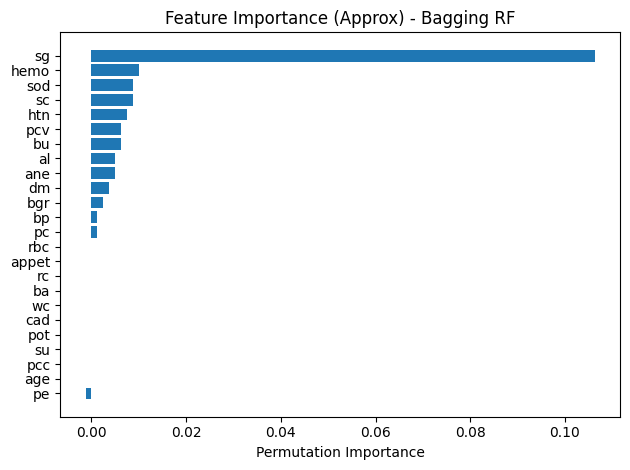

In [3064]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Plot
sorted_idx = result.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Approx) - Bagging RF")
plt.tight_layout()
plt.show()

Decision Tree

In [3065]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_dt = DecisionTreeClassifier(random_state=42)

bagging_dt = BaggingClassifier(estimator=base_dt, n_estimators=30, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)

print("\nBagging with Decision Trees Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))


Bagging with Decision Trees Results:
Accuracy: 0.9875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



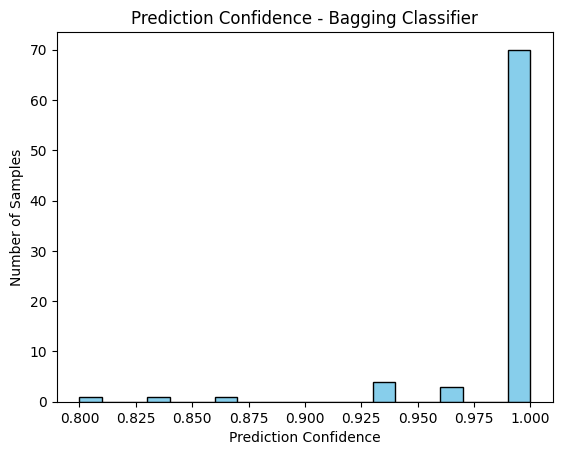

In [3066]:
probs = bagging_dt.predict_proba(X_test).max(axis=1)
plt.hist(probs, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Samples")
plt.title("Prediction Confidence - Bagging Classifier")
plt.show()

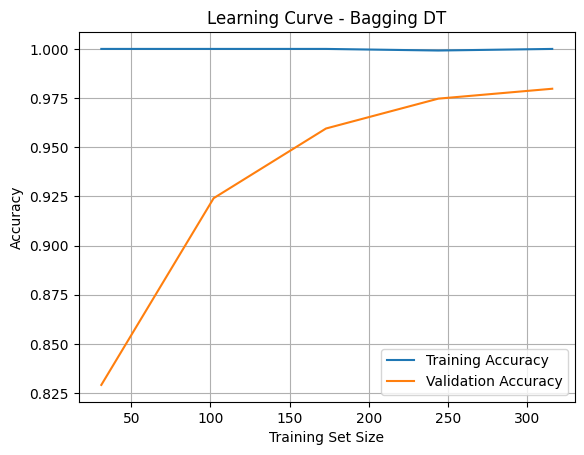

In [3067]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    bagging_dt, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Bagging DT')
plt.legend()
plt.grid(True)
plt.show()

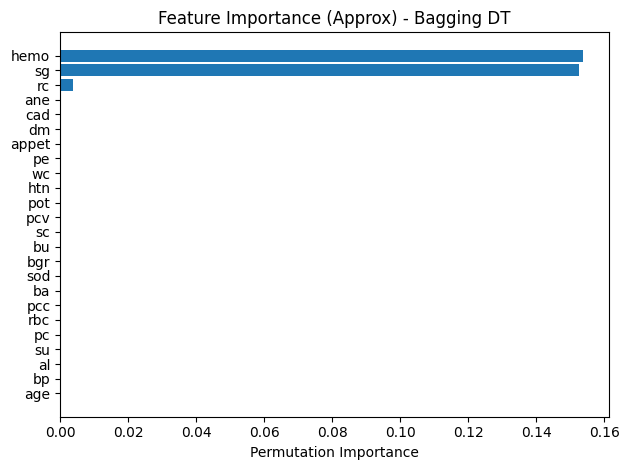

In [3068]:
from sklearn.inspection import permutation_importance

result = permutation_importance(bagging_dt, X_test, y_test, n_repeats=10, random_state=42)

# Plot
sorted_idx = result.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Approx) - Bagging DT")
plt.tight_layout()
plt.show()

SVM

In [3069]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

base_svm = SVC(kernel='linear', random_state=42)

bagging_svm = BaggingClassifier(estimator=base_svm, n_estimators=30, random_state=42)
bagging_svm.fit(X_train, y_train)
y_pred_svm = bagging_svm.predict(X_test)

print("\nBagging with SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


Bagging with SVM Results:
Accuracy: 0.9875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



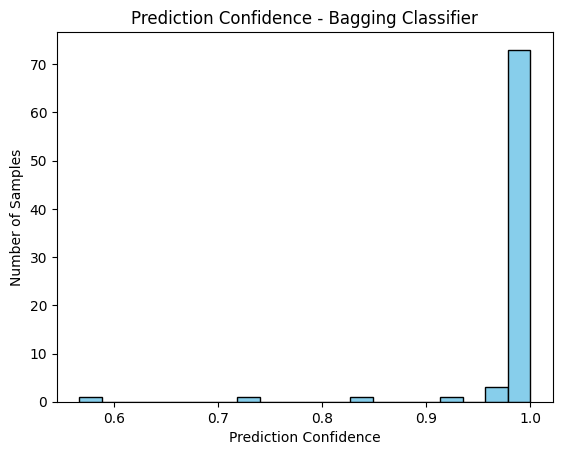

In [3070]:
probs_svm = bagging_svm.predict_proba(X_test).max(axis=1)
plt.hist(probs_svm, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Samples")
plt.title("Prediction Confidence - Bagging Classifier")
plt.show()

C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\krsam\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1

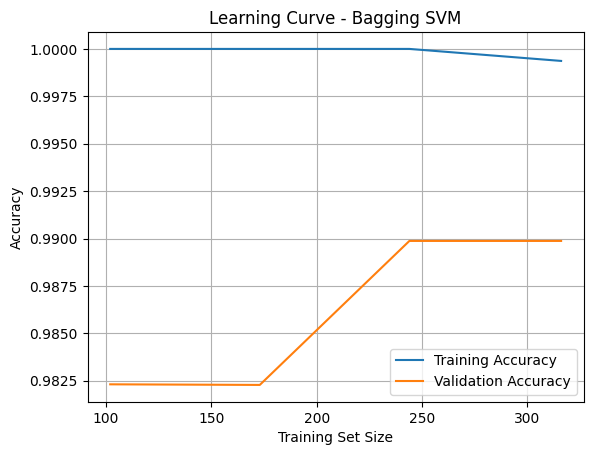

In [3071]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    bagging_svm, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Bagging SVM')
plt.legend()
plt.grid(True)
plt.show()


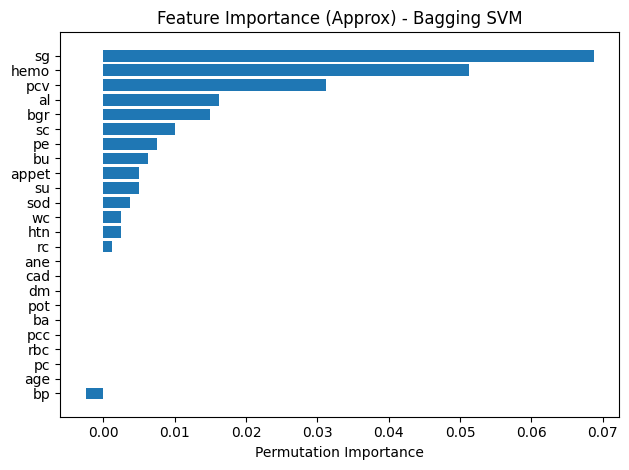

In [3072]:
from sklearn.inspection import permutation_importance

result = permutation_importance(bagging_svm, X_test, y_test, n_repeats=10, random_state=42)

# Plot
sorted_idx = result.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Approx) - Bagging SVM")
plt.tight_layout()
plt.show()


KNN

In [3073]:
base_knn = KNeighborsClassifier(n_neighbors=3)
bagging_knn = BaggingClassifier(estimator=base_knn, n_estimators=30, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)

print("\nBagging with KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))


Bagging with KNN Results:
Accuracy: 0.9750
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



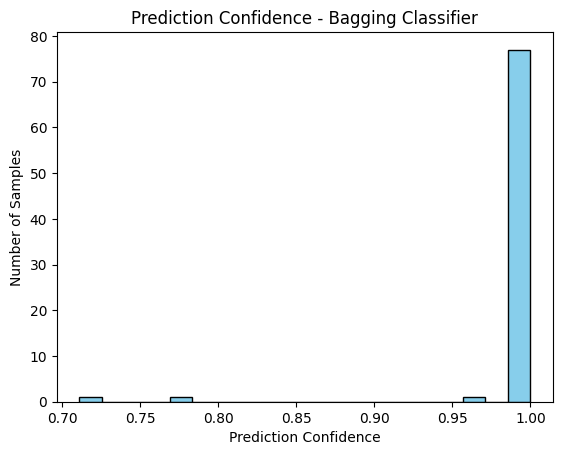

In [3074]:
probs_knn = bagging_knn.predict_proba(X_test).max(axis=1)
plt.hist(probs_knn, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Samples")
plt.title("Prediction Confidence - Bagging Classifier")
plt.show()

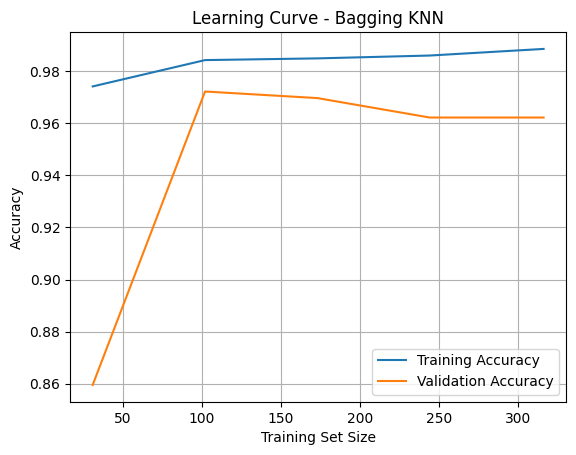

In [3075]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    bagging_knn, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Bagging KNN')
plt.legend()
plt.grid(True)
plt.show()

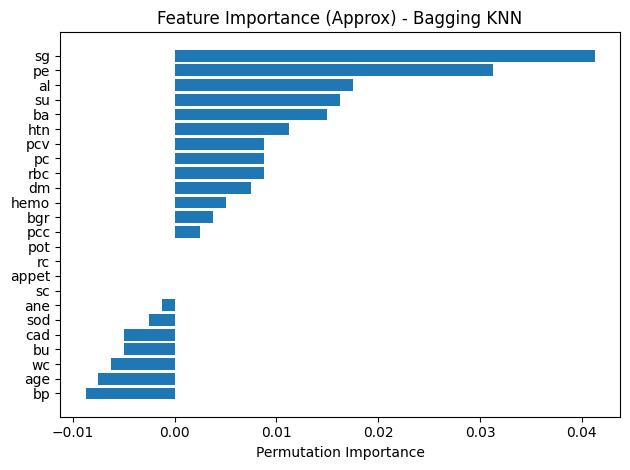

In [3076]:
from sklearn.inspection import permutation_importance

result = permutation_importance(bagging_knn, X_test, y_test, n_repeats=10, random_state=42)

# Plot
sorted_idx = result.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Approx) - Bagging KNN")
plt.tight_layout()
plt.show()

Stacking

In [3077]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

base_learners = [
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier(n_estimators=30, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

In [3078]:
meta_model = LogisticRegression()

In [3079]:
stack = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)    

print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))

Stacking Accuracy: 1.0


In [3080]:
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



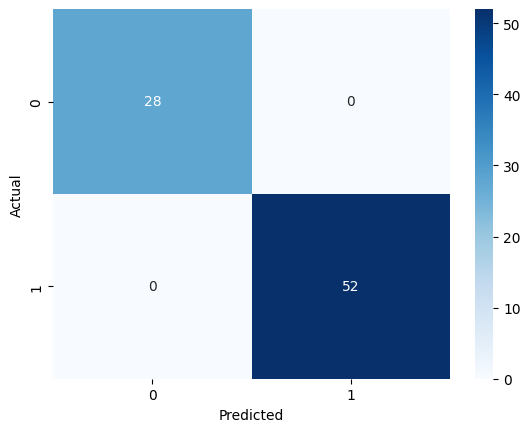

In [3081]:
cf_stack = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cf_stack, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

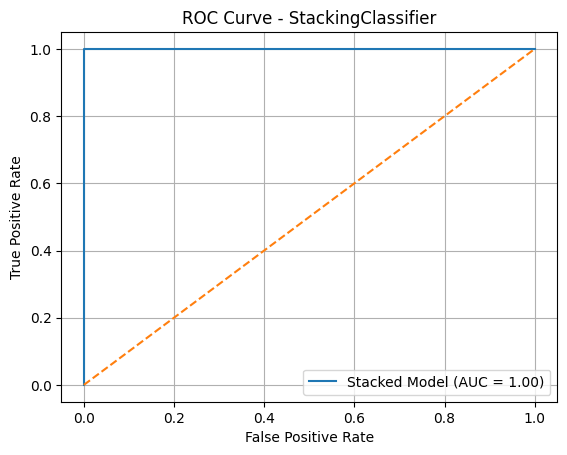

In [3082]:
from sklearn.metrics import roc_curve, auc

# Probability scores for stacked model
y_proba = stack.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Stacked Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - StackingClassifier')
plt.legend()
plt.grid()
plt.show()


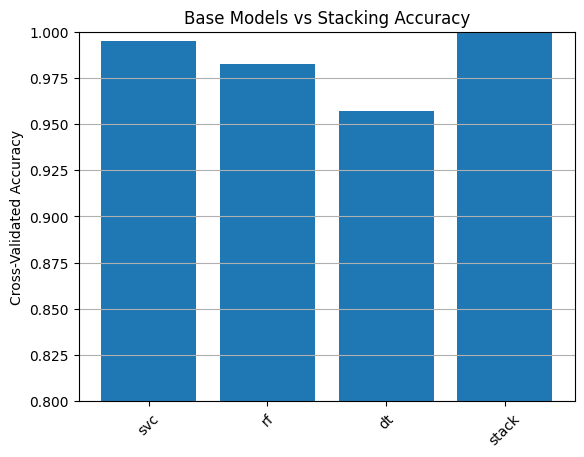

In [3083]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = base_learners + [('stack', stack)]

scores = {}
for name, model in models:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores[name] = score.mean()

plt.bar(scores.keys(), scores.values())
plt.ylabel("Cross-Validated Accuracy")
plt.title("Base Models vs Stacking Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.8, 1)
plt.grid(axis='y')
plt.show()


In [3084]:
import shap
import pandas as pd


explainer_rf = shap.Explainer(stack.named_estimators_['rf'], X_train)
shap_values_rf = explainer_rf(X_test)

shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

ModuleNotFoundError: No module named 'shap'

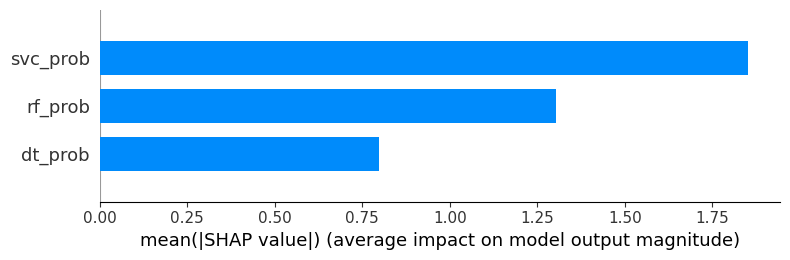

In [ ]:
meta_input_train = np.column_stack([
    stack.named_estimators_['svc'].predict_proba(X_train)[:, 1],
    stack.named_estimators_['rf'].predict_proba(X_train)[:, 1],
    stack.named_estimators_['dt'].predict_proba(X_train)[:, 1]
])

meta_input_test = np.column_stack([
    stack.named_estimators_['svc'].predict_proba(X_test)[:, 1],
    stack.named_estimators_['rf'].predict_proba(X_test)[:, 1],
    stack.named_estimators_['dt'].predict_proba(X_test)[:, 1]
])

meta_features = ['svc_prob', 'rf_prob', 'dt_prob']
meta_train_df = pd.DataFrame(meta_input_train, columns=meta_features)
meta_test_df = pd.DataFrame(meta_input_test, columns=meta_features)

explainer = shap.Explainer(stack.final_estimator_, meta_train_df)
shap_values = explainer(meta_test_df)

shap.summary_plot(shap_values, meta_test_df, plot_type="bar")


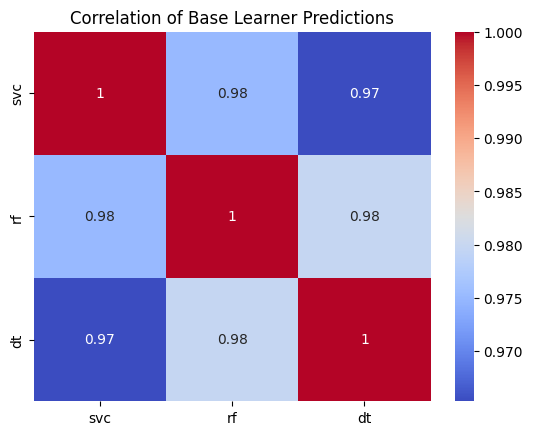

In [ ]:
stacked_inputs = np.column_stack([
    stack.named_estimators_[name].predict_proba(X_test)[:, 1] for name, _ in base_learners
])

# Correlation matrix
corr_matrix = np.corrcoef(stacked_inputs, rowvar=False)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, 
            xticklabels=[name for name, _ in base_learners], 
            yticklabels=[name for name, _ in base_learners],
            cmap='coolwarm')
plt.title("Correlation of Base Learner Predictions")
plt.show()

Boosting

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.2, random_state=42)
gb.fit(X_train, y_train)
y_pred_boost = gb.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))

Boosting Accuracy: 0.9875


In [ ]:
print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



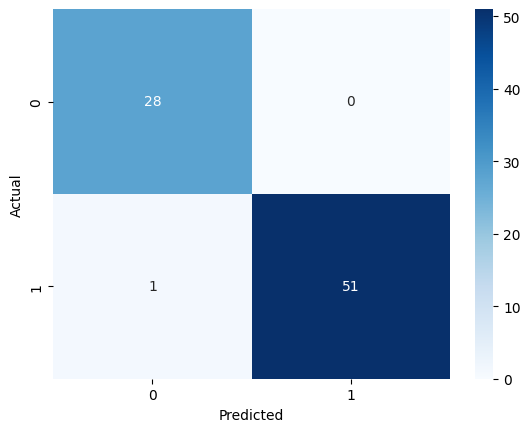

In [ ]:
cf_boost = confusion_matrix(y_test, y_pred_boost)
sns.heatmap(cf_boost, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

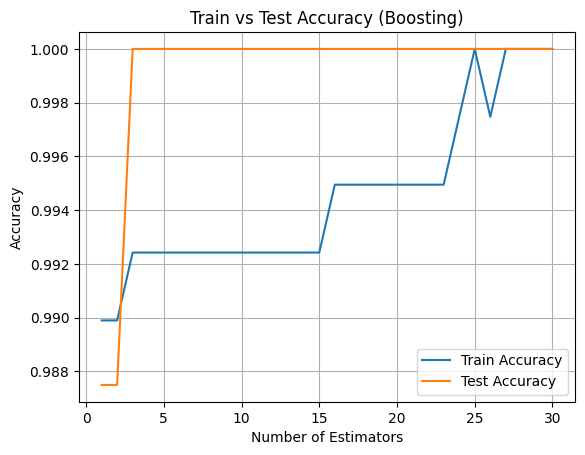

In [ ]:
train_scores = []
test_scores = []

for n in range(1, gb.n_estimators + 1):
    gb_partial = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    gb_partial.fit(X_train, y_train)
    train_scores.append(gb_partial.score(X_train, y_train))
    test_scores.append(gb_partial.score(X_test, y_test))

plt.plot(range(1, gb.n_estimators + 1), train_scores, label='Train Accuracy')
plt.plot(range(1, gb.n_estimators + 1), test_scores, label='Test Accuracy')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy (Boosting)")
plt.legend()
plt.grid()
plt.show()

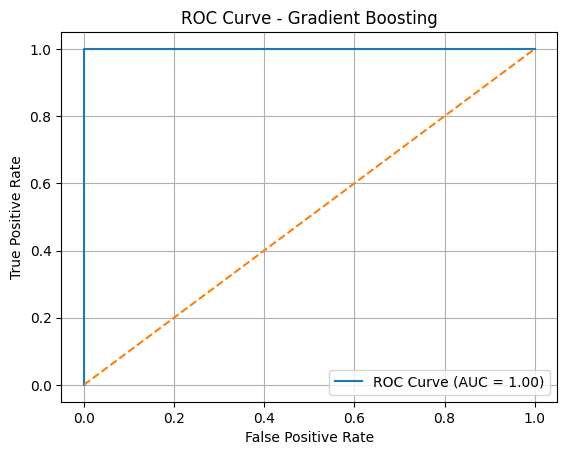

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = gb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.grid()
plt.show()

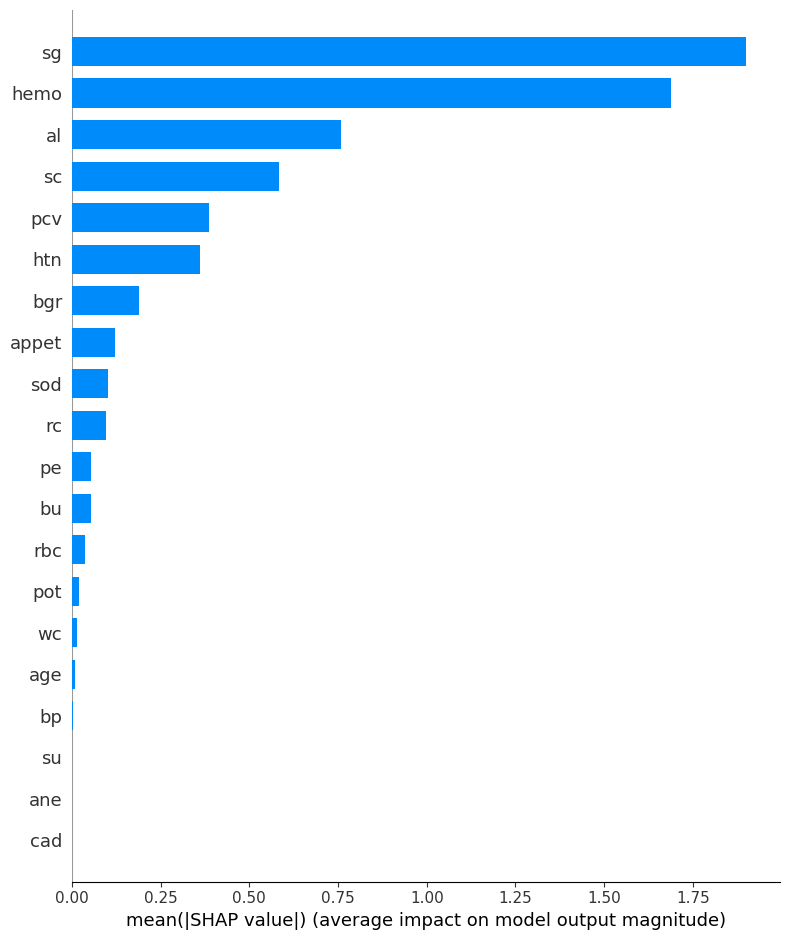

In [ ]:
import shap

explainer = shap.Explainer(gb, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

XG Boosting

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=30,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

c:\Users\91801\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:37:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9875


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



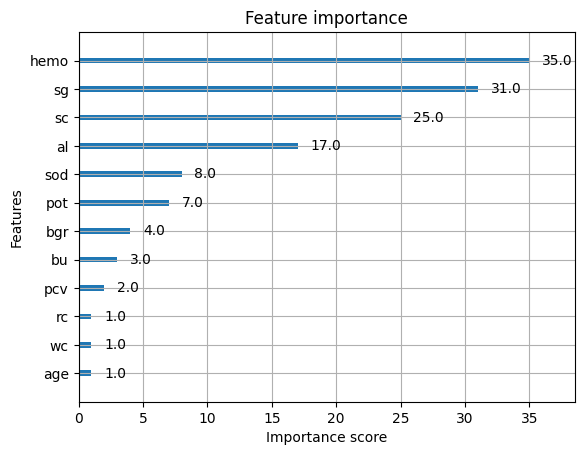

In [ ]:
xgb.plot_importance(model)
plt.show()

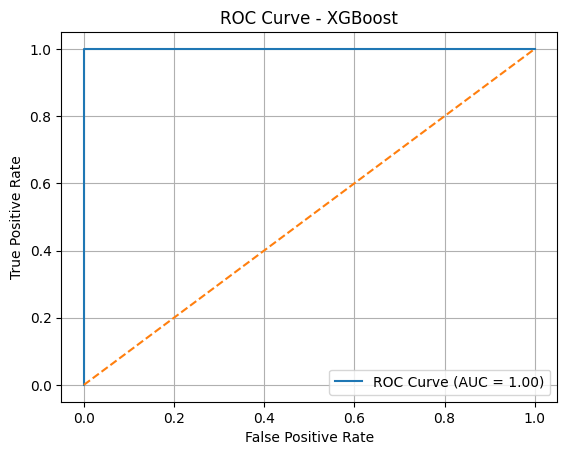

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid()
    
plt.show()